#1. Import Libraries & Data




In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
google_sheet_id = '1wqK9-cohC5FmXuGgdBkBkZjSDSz3f6fDgdiHdI33CSE'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
df = pd.read_excel(url, sheet_name ='kc_house_data' )

#2. Data Profiling


##2.1. First 10 rows


In [ ]:
pd.set_option('display.max_columns', None)
df.head()


id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

##2.2. Data basic info


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

#3. Data Cleaning

##3.1. Handling missing value

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

D·ªØ li·ªáu ƒë√£ ƒë·∫ßy ƒë·ªß, kh√¥ng ch·ª©a gi√° tr·ªã thi·∫øu n√™n kh√¥ng c·∫ßn x·ª≠ l√Ω missing data.

##3.2. Types fixing

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

for col in df.columns:
    if col != 'date':
        df[col] = df[col].astype(float)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  float64       
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  float64       
 9   view           21613 non-null  float64       
 10  condition      21613 non-null  float64       
 11  grade          21613 non-null  float64       
 12  sqft_above     21613 non-null  float64       
 13  sqft_basement  21613 non-null  float64       
 14  yr_built       21613 non-null  float64       
 15  yr_renovated   2161

S·ª≠a d·ªØ li·ªáu v·ªÅ ƒë√∫ng ƒë·ªãnh d·∫°ng: C·ªôt date chuy·ªÉn v·ªÅ d·∫°ng datetime64[ns], c√°c c·ªôt c√≤n l·∫°i v·ªÅ d·ªØ li·ªáu th√≠ch h·ª£p.

##3.3. Remove duplicate


In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  float64       
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  float64       
 9   view           21613 non-null  float64       
 10  condition      21613 non-null  float64       
 11  grade          21613 non-null  float64       
 12  sqft_above     21613 non-null  float64       
 13  sqft_basement  21613 non-null  float64       
 14  yr_built       21613 non-null  float64       
 15  yr_renovated   2161

K·∫øt qu·∫£ cho th·∫•y kh√¥ng c√≥ d√≤ng tr√πng l·∫∑p n√†o, d·ªØ li·ªáu v·∫´n gi·ªØ nguy√™n v·ªõi 21,613 d√≤ng.

##3.3. Handling outliers

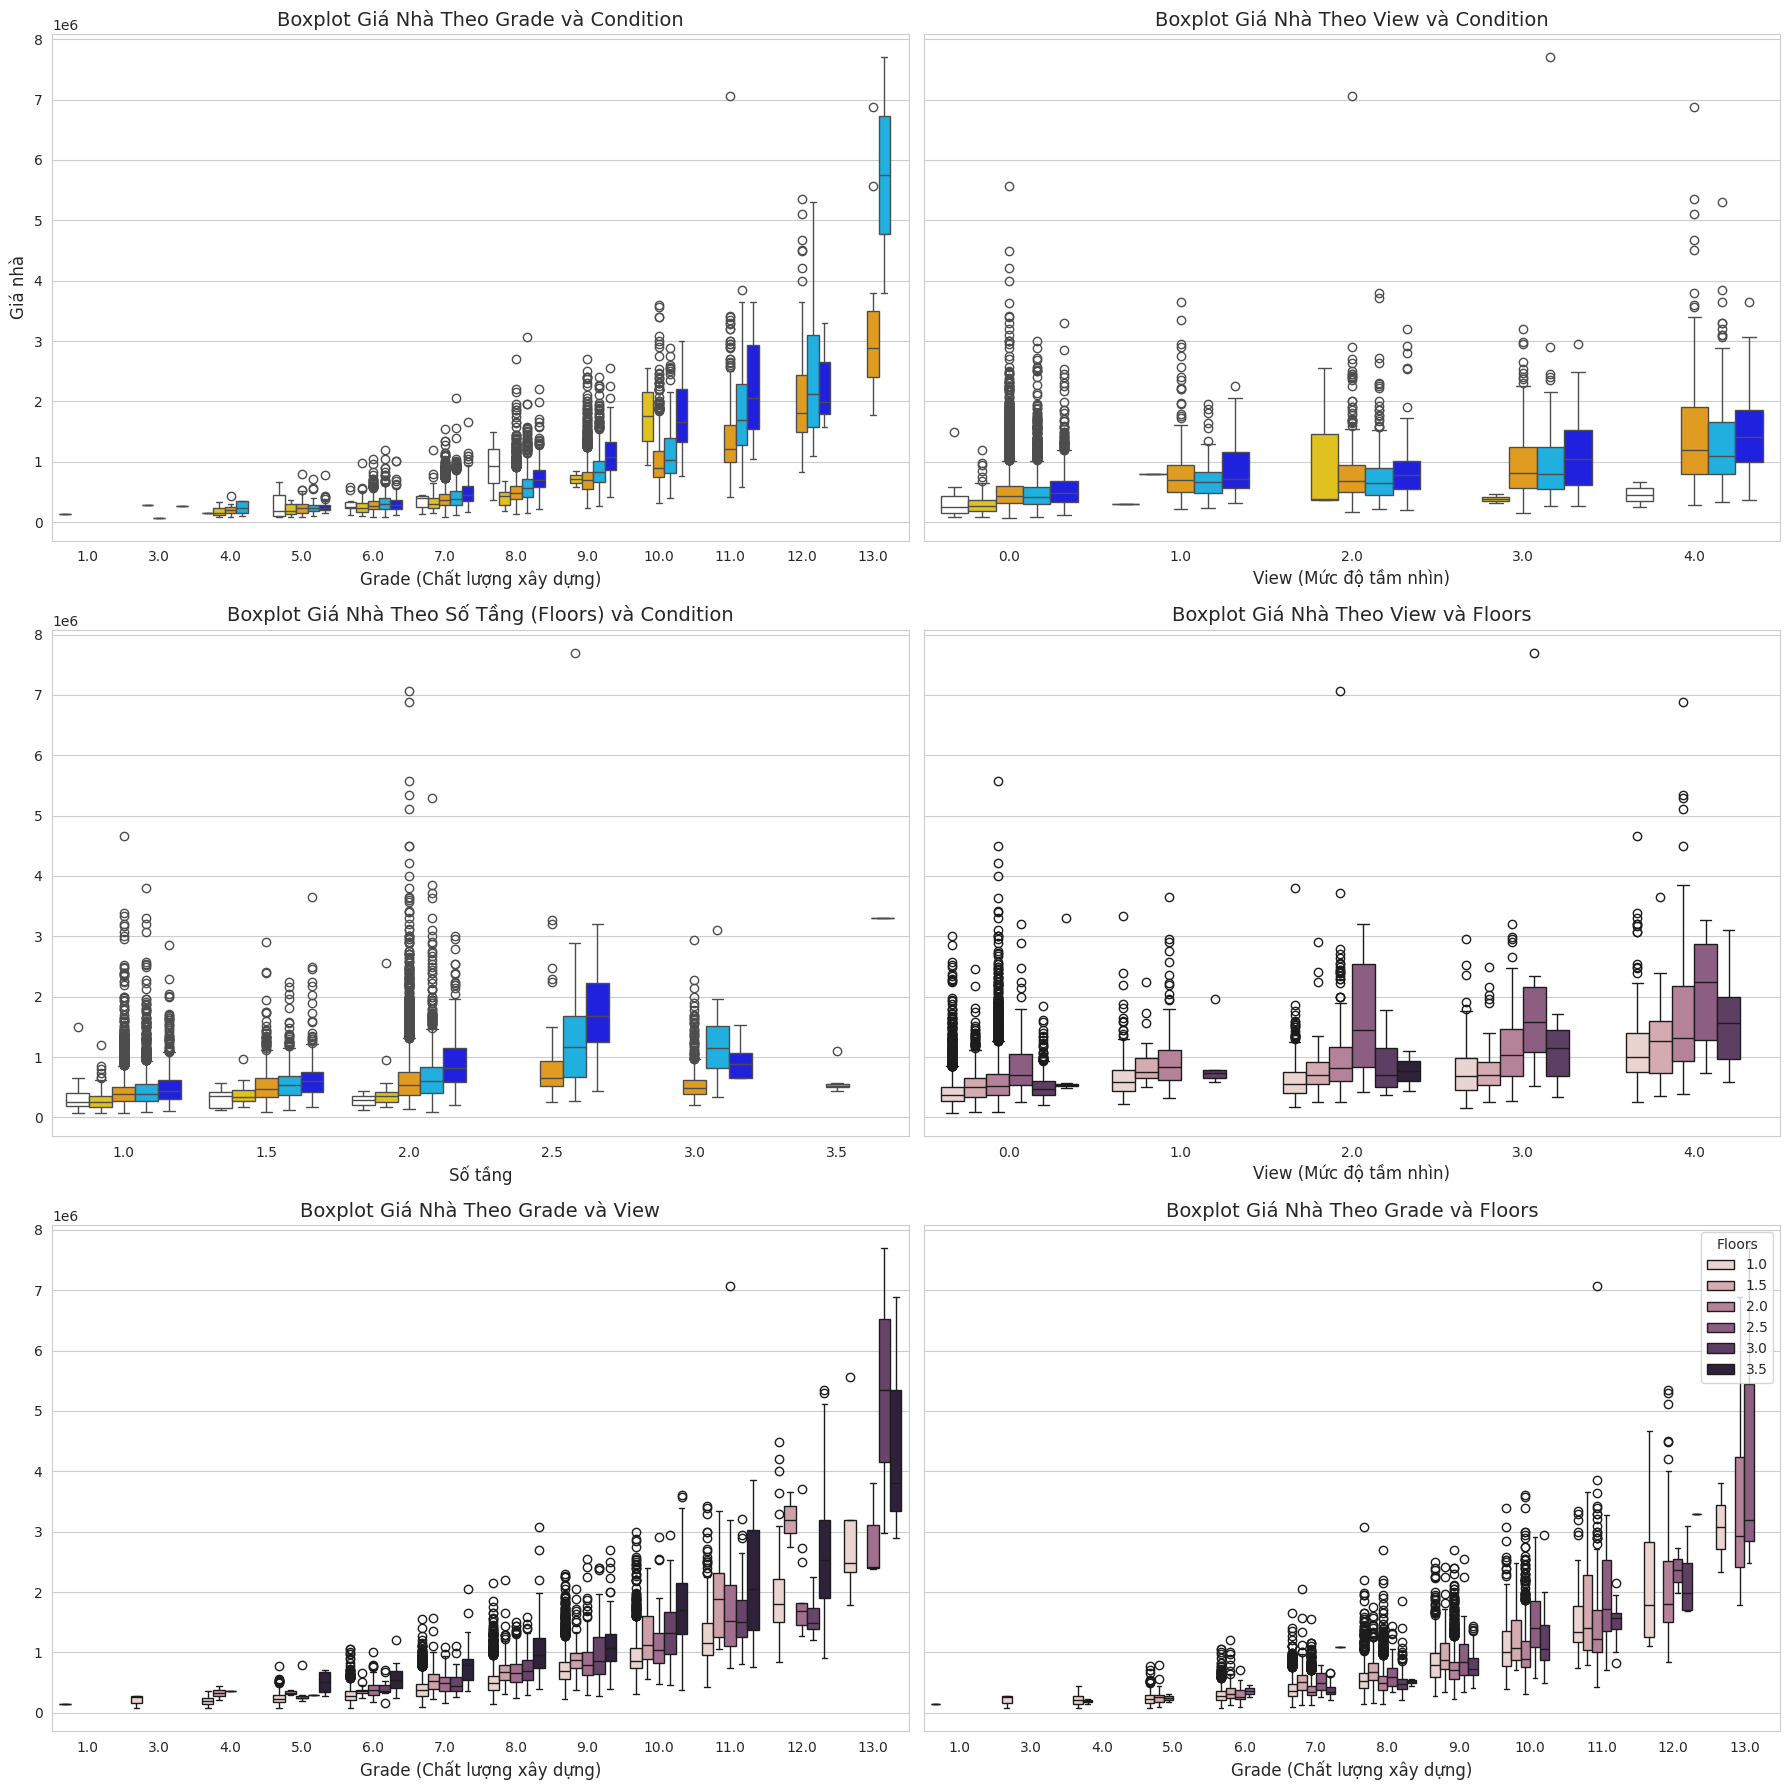

In [ ]:
# T√πy ch·ªânh b·∫£ng m√†u gradient theo condition (1 ‚Üí 5)
custom_palette = {
    1: "#ffffff",  # Tr·∫Øng
    2: "#ffd700",  # V√†ng
    3: "#ffa500",  # Cam
    4: "#00bfff",  # Xanh da tr·ªùi
    5: "#0000ff",  # Xanh d∆∞∆°ng
}

fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharey=True)
axes = axes.flatten()

# 1. Price vs Grade (hue = Condition)
sns.boxplot(ax=axes[0], x='grade', y='price', hue='condition', data=df, palette=custom_palette)
axes[0].set_title('Boxplot Gi√° Nh√† Theo Grade v√† Condition', fontsize=14)
axes[0].set_xlabel('Grade (Ch·∫•t l∆∞·ª£ng x√¢y d·ª±ng)', fontsize=12)
axes[0].set_ylabel('Gi√° nh√†', fontsize=12)
axes[0].legend_.remove()

# 2. Price vs View (hue = Condition)
sns.boxplot(ax=axes[1], x='view', y='price', hue='condition', data=df, palette=custom_palette)
axes[1].set_title('Boxplot Gi√° Nh√† Theo View v√† Condition', fontsize=14)
axes[1].set_xlabel('View (M·ª©c ƒë·ªô t·∫ßm nh√¨n)', fontsize=12)
axes[1].set_ylabel('')
axes[1].legend_.remove()

# 3. Price vs Floors (hue = Condition)
sns.boxplot(ax=axes[2], x='floors', y='price', hue='condition', data=df, palette=custom_palette)
axes[2].set_title('Boxplot Gi√° Nh√† Theo S·ªë T·∫ßng (Floors) v√† Condition', fontsize=14)
axes[2].set_xlabel('S·ªë t·∫ßng', fontsize=12)
axes[2].set_ylabel('')
axes[2].legend_.remove()

# 4. Price vs View (hue = Floors)
sns.boxplot(ax=axes[3], x='view', y='price', hue='floors', data=df)
axes[3].set_title('Boxplot Gi√° Nh√† Theo View v√† Floors', fontsize=14)
axes[3].set_xlabel('View (M·ª©c ƒë·ªô t·∫ßm nh√¨n)', fontsize=12)
axes[3].set_ylabel('Gi√° nh√†', fontsize=12)
axes[3].legend_.remove()

# 5. Price vs Grade (hue = View)
sns.boxplot(ax=axes[4], x='grade', y='price', hue='view', data=df)
axes[4].set_title('Boxplot Gi√° Nh√† Theo Grade v√† View', fontsize=14)
axes[4].set_xlabel('Grade (Ch·∫•t l∆∞·ª£ng x√¢y d·ª±ng)', fontsize=12)
axes[4].set_ylabel('')
axes[4].legend_.remove()

# 6. Price vs Grade (hue = Floors)
sns.boxplot(ax=axes[5], x='grade', y='price', hue='floors', data=df)
axes[5].set_title('Boxplot Gi√° Nh√† Theo Grade v√† Floors', fontsize=14)
axes[5].set_xlabel('Grade (Ch·∫•t l∆∞·ª£ng x√¢y d·ª±ng)', fontsize=12)
axes[5].set_ylabel('')
# Hi·ªÉn th·ªã legend ·ªü bi·ªÉu ƒë·ªì cu·ªëi c√πng
handles, labels = axes[5].get_legend_handles_labels()
axes[5].legend(handles, labels, title="Floors", loc='upper right')

plt.tight_layout()
plt.show()
# H√†m x√°c ƒë·ªãnh ch·ªâ s·ªë outliers d·ª±a tr√™n 2 bi·∫øn nh√≥m
def get_outlier_indices(df, g1, g2, target):
    outlier_indices = set()
    for v1 in df[g1].unique():
        for v2 in df[g2].unique():
            group_data = df[(df[g1] == v1) & (df[g2] == v2)][target]
            if len(group_data) < 5:
                continue
            q1 = group_data.quantile(0.25)
            q3 = group_data.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            mask = ((df[g1] == v1) & (df[g2] == v2) &
                    ((df[target] < lower) | (df[target] > upper)))
            outlier_indices.update(df[mask].index)
    return outlier_indices

# X√°c ƒë·ªãnh outliers t·ª´ 6 bi·ªÉu ƒë·ªì t·ªï h·ª£p
out1 = get_outlier_indices(df, 'grade', 'condition', 'price')
out2 = get_outlier_indices(df, 'view', 'condition', 'price')
out3 = get_outlier_indices(df, 'floors', 'condition', 'price')
out4 = get_outlier_indices(df, 'view', 'floors', 'price')     # s·ª≠a l·ªói ·ªü ƒë√¢y
out5 = get_outlier_indices(df, 'grade', 'view', 'price')
out6 = get_outlier_indices(df, 'grade', 'floors', 'price')

# Giao c·ªßa t·∫•t c·∫£ outliers ‚Äì nh·ªØng ƒëi·ªÉm l√† outlier ·ªü c·∫£ 6 bi·ªÉu ƒë·ªì
final_outliers = out1 & out2 & out3 & out4 & out5 & out6

# Xo√° kh·ªèi DataFrame g·ªëc
df_cleaned_price = df.drop(index=final_outliers)



In [ ]:
df_cleaned_price.info()
df_cleaned_price.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 21475 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21475 non-null  float64       
 1   date           21475 non-null  datetime64[ns]
 2   price          21475 non-null  float64       
 3   bedrooms       21475 non-null  float64       
 4   bathrooms      21475 non-null  float64       
 5   sqft_living    21475 non-null  float64       
 6   sqft_lot       21475 non-null  float64       
 7   floors         21475 non-null  float64       
 8   waterfront     21475 non-null  float64       
 9   view           21475 non-null  float64       
 10  condition      21475 non-null  float64       
 11  grade          21475 non-null  float64       
 12  sqft_above     21475 non-null  float64       
 13  sqft_basement  21475 non-null  float64       
 14  yr_built       21475 non-null  float64       
 15  yr_renovated   21475 non

id                           date         price  \
count  2.147500e+04                          21475  2.147500e+04   
mean   4.582209e+09  2014-10-29 01:19:55.753201152  5.313861e+05   
min    1.000102e+06            2014-05-02 00:00:00  7.500000e+04   
25%    2.123050e+09            2014-07-22 00:00:00  3.200000e+05   
50%    3.904940e+09            2014-10-16 00:00:00  4.500000e+05   
75%    7.312300e+09            2015-02-17 00:00:00  6.390000e+05   
max    9.900000e+09            2015-05-27 00:00:00  7.700000e+06   
std    2.876977e+09                            NaN  3.458438e+05   

           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21475.000000  21475.000000  21475.000000  2.147500e+04  21475.000000   
mean       3.366286      2.108824   2070.007823  1.511383e+04      1.493295   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.500000   1420.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.600000e+03      1.500000   
75%        4.000000      2.500000   2540.000000  1.062400e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   
std        0.928194      0.764891    907.055948  4.154621e+04      0.540074   

         waterfront          view     condition         grade    sqft_above  \
count  21475.000000  21475.000000  21475.000000  21475.000000  21475.000000   
mean       0.007451      0.234412      3.410291      7.648289   1780.203632   
min        0.000000      0.000000      1.000000      1.000000    290.000000   
25%        0.000000      0.000000      3.000000      7.000000   1190.000000   
50%        0.000000      0.000000      3.000000      7.000000   1560.000000   
75%        0.000000      0.000000      4.000000      8.000000   2200.000000   
max        1.000000      4.000000      5.000000     13.000000   9410.000000   
std        0.085996      0.766485      0.651473      1.171089    819.075533   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   21475.000000  21475.000000  21475.000000  21475.000000  21475.000000   
mean      289.804191   1971.020489     82.150547  98078.122002     47.559610   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1951.000000      0.000000  98033.000000     47.469500   
50%         0.000000   1975.000000      0.000000  98065.000000     47.570800   
75%       560.000000   1997.000000      0.000000  98118.000000     47.678300   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   
std       440.533139     29.353121    396.503593     53.477115      0.138876   

               long  sqft_living15     sqft_lot15  
count  21475.000000   21475.000000   21475.000000  
mean    -122.213706    1980.437206   12768.554179  
min     -122.519000     399.000000     651.000000  
25%     -122.329000    1480.000000    5100.000000  
50%     -122.231000    1830.000000    7619.000000  
75%     -122.124000    2350.000000   10050.000000  
max     -121.315000    6210.000000  871200.000000  
std        0.141186     680.326523   27385.708415

N·∫øu lo·∫°i b·ªè outliers d·ª±a tr√™n to√†n b·ªô t·∫≠p d·ªØ li·ªáu, ta c√≥ th·ªÉ v√¥ t√¨nh lo·∫°i ƒëi nh·ªØng bi·∫øn outliers nh∆∞ng ph√π h·ª£p v·ªõi th·ª±c t·∫ø v√≠ d·ª• nh∆∞ cƒÉn nh√† tuy c√≥ gi√° cao v∆∞·ª£t tr·ªôi (outliers), nh∆∞ng l·∫°i h·ª£p l√Ω v√¨ s·ªü h·ªØu c√°c ƒë·∫∑c ƒëi·ªÉm t·ªët nh∆∞ ch·∫•t l∆∞·ª£ng x√¢y d·ª±ng cao, t·∫ßm nh√¨n ƒë·∫πp, ho·∫∑c nhi·ªÅu t·∫ßng.

V√¨ v·∫≠y, em ƒë√£ th·ª±c hi·ªán tr·ª±c quan h√≥a d·ªØ li·ªáu b·∫±ng bi·ªÉu ƒë·ªì boxplot c·ªßa gi√° nh√† (price) theo t·ª´ng c·∫∑p bi·∫øn ƒë·∫∑c tr∆∞ng g·ªìm: grade, condition, view v√† floors. Sau khi ph√¢n t√≠ch t·ª´ng bi·ªÉu ƒë·ªì, em ch·ªâ lo·∫°i b·ªè nh·ªØng ƒëi·ªÉm ƒë∆∞·ª£c x√°c ƒë·ªãnh l√† outliers n·∫øu ch√∫ng xu·∫•t hi·ªán ƒë·ªìng th·ªùi trong nhi·ªÅu bi·ªÉu ƒë·ªì, nh·∫±m ƒë·∫£m b·∫£o vi·ªác x·ª≠ l√Ω outliers ƒë∆∞·ª£c h·ª£p l√Ω v√† c√≥ ch·ªçn l·ªçc h∆°n.

In [ ]:
# H√†m nh√≥m di·ªán t√≠ch s·ªëng
def assign_living_group(sqft):
    if sqft < 1100:
        return 1
    elif sqft <= 1680:
        return 2
    elif sqft <= 2350:
        return 3
    elif sqft <= 3250:
        return 4
    elif sqft <= 4150:
        return 5
    elif sqft <= 5100:
        return 6
    elif sqft <= 6500:
        return 7
    else:
        return 8

# H√†m x√≥a outliers theo nh√≥m
def remove_outliers_by_group(df, group_col, target_cols):
    cleaned_df = pd.DataFrame()
    for group in sorted(df[group_col].dropna().unique()):
        group_data = df[df[group_col] == group]
        for col in target_cols:
            Q1 = group_data[col].quantile(0.25)
            Q3 = group_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            group_data = group_data[(group_data[col] >= lower) & (group_data[col] <= upper)]
        cleaned_df = pd.concat([cleaned_df, group_data], ignore_index=True)

    return cleaned_df.reset_index(drop=True)

# √Åp d·ª•ng l√™n df_cleaned_price ƒë·ªÉ l·ªçc ti·∫øp bedrooms, bathrooms theo t·ª´ng nh√≥m di·ªán t√≠ch
df_temp = df_cleaned_price.copy()
df_temp['living_group'] = df_temp['sqft_living'].apply(assign_living_group)

df_cleaned_room = remove_outliers_by_group(df_temp, 'living_group', ['bedrooms', 'bathrooms','sqft_basement','sqft_above'])

# X√≥a c·ªôt ph·ª•
df_cleaned_room.drop(columns=['living_group'], inplace=True)

# Ki·ªÉm tra k·∫øt qu·∫£
df_cleaned_room.info()
df_cleaned_room.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17358 entries, 0 to 17357
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17358 non-null  float64       
 1   date           17358 non-null  datetime64[ns]
 2   price          17358 non-null  float64       
 3   bedrooms       17358 non-null  float64       
 4   bathrooms      17358 non-null  float64       
 5   sqft_living    17358 non-null  float64       
 6   sqft_lot       17358 non-null  float64       
 7   floors         17358 non-null  float64       
 8   waterfront     17358 non-null  float64       
 9   view           17358 non-null  float64       
 10  condition      17358 non-null  float64       
 11  grade          17358 non-null  float64       
 12  sqft_above     17358 non-null  float64       
 13  sqft_basement  17358 non-null  float64       
 14  yr_built       17358 non-null  float64       
 15  yr_renovated   1735

id                           date         price  \
count  1.735800e+04                          17358  1.735800e+04   
mean   4.582528e+09  2014-10-28 05:21:42.868994048  5.427353e+05   
min    1.200019e+06            2014-05-02 00:00:00  7.800000e+04   
25%    2.123049e+09            2014-07-21 00:00:00  3.244625e+05   
50%    3.905030e+09            2014-10-15 00:00:00  4.550000e+05   
75%    7.312400e+09            2015-02-14 00:00:00  6.500000e+05   
max    9.900000e+09            2015-05-27 00:00:00  7.700000e+06   
std    2.876737e+09                            NaN  3.592134e+05   

           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  17358.000000  17358.000000  17358.000000  1.735800e+04  17358.000000   
mean       3.406729      2.157694   2142.384261  1.556657e+04      1.511320   
min        1.000000      0.750000    500.000000  6.090000e+02      1.000000   
25%        3.000000      1.750000   1510.000000  5.350500e+03      1.000000   
50%        3.000000      2.250000   1990.000000  7.820000e+03      1.500000   
75%        4.000000      2.500000   2570.000000  1.094450e+04      2.000000   
max        8.000000      8.000000  12050.000000  1.164794e+06      3.500000   
std        0.785978      0.736859    922.929056  4.027892e+04      0.539024   

         waterfront          view     condition         grade    sqft_above  \
count  17358.000000  17358.000000  17358.000000  17358.000000  17358.000000   
mean       0.007317      0.235281      3.402927      7.737124   1861.856666   
min        0.000000      0.000000      1.000000      4.000000    500.000000   
25%        0.000000      0.000000      3.000000      7.000000   1250.000000   
50%        0.000000      0.000000      3.000000      8.000000   1650.000000   
75%        0.000000      0.000000      4.000000      8.000000   2300.000000   
max        1.000000      4.000000      5.000000     13.000000   8570.000000   
std        0.085226      0.768733      0.642807      1.189473    836.235066   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   17358.000000  17358.000000  17358.000000  17358.000000  17358.000000   
mean      280.527595   1973.259074     75.192879  98074.097938     47.554724   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1955.000000      0.000000  98031.000000     47.455100   
50%         0.000000   1977.000000      0.000000  98058.000000     47.566700   
75%       530.000000   1998.000000      0.000000  98116.000000     47.676975   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   
std       445.819323     28.342277    380.035576     52.894147      0.141445   

              long  sqft_living15     sqft_lot15  
count  17358.00000   17358.000000   17358.000000  
mean    -122.20319    2042.207973   13169.576679  
min     -122.51500     399.000000     651.000000  
25%     -122.31900    1530.000000    5399.250000  
50%     -122.21100    1910.000000    7800.000000  
75%     -122.11400    2430.000000   10295.000000  
max     -121.31500    6210.000000  871200.000000  
std        0.14096     696.007614   27378.573823

T∆∞∆°ng t·ª± nh∆∞ v·ªõi gi√° nh√†, n·∫øu lo·∫°i b·ªè outliers c·ªßa bedrooms, bathrooms, sqft_basement, sqft_above m·ªôt c√°ch t·ªïng th·ªÉ, ta c√≥ th·ªÉ x√≥a nh·∫ßm nh·ªØng cƒÉn nh√† c√≥ nhi·ªÅu ph√≤ng t·∫Øm, ph√≤ng ng·ªß c≈©ng nh∆∞ c√≥ di·ªán t√≠ch t·∫ßng h·∫ßm l·ªõn, ƒë√¢y l√† ƒëi·ªÅu ho√†n to√†n h·ª£p l√Ω ƒë·ªëi v·ªõi nh·ªØng cƒÉn nh√† c√≥ di·ªán t√≠ch l·ªõn.

V√¨ v·∫≠y, em ƒë√£ chia di·ªán t√≠ch s·ª≠ d·ª•ng (sqft_living) th√†nh 8 nh√≥m t·ª´ nh·ªè ƒë·∫øn l·ªõn th√≠ch h·ª£p. Sau ƒë√≥, em s·ª≠ d·ª•ng bi·ªÉu ƒë·ªì boxplot ƒë·ªÉ ki·ªÉm tra v√† lo·∫°i b·ªè outliers c·ªßa bedrooms,bathrooms, sqft_basement, sqft_above trong t·ª´ng nh√≥m di·ªán t√≠ch ri√™ng bi·ªát. C√°ch ti·∫øp c·∫≠n n√†y gi√∫p ƒë·∫£m b·∫£o vi·ªác x·ª≠ l√Ω outliers ch√≠nh x√°c v√† ph√π h·ª£p
ng·ªØ c·∫£nh th·ª±c t·∫ø c·ªßa d·ªØ li·ªáu.

In [ ]:
# B∆∞·ªõc 1: T·∫°o nh√≥m gi√°
def assign_price_group(price):
    if price < 250000:
        return '1'
    elif price < 500000:
        return '2'
    elif price < 750000:
        return '3'
    elif price < 1000000:
        return '4'
    elif price < 1500000:
        return '5'
    elif price < 2000000:
        return '6'
    elif price < 4000000:
        return '7'
    else:
        return '8'

df_cleaned_room['price_group'] = df_cleaned_room['price'].apply(assign_price_group)

# B∆∞·ªõc 2: H√†m x√≥a outliers theo nh√≥m gi√° (IQR)
def remove_outliers_by_price_group(df, group_col, target_cols):
    cleaned_df = pd.DataFrame()

    for group in sorted(df[group_col].dropna().unique()):
        group_data = df[df[group_col] == group].copy()

        for col in target_cols:
            Q1 = group_data[col].quantile(0.25)
            Q3 = group_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            group_data = group_data[(group_data[col] >= lower) & (group_data[col] <= upper)]

        cleaned_df = pd.concat([cleaned_df, group_data], ignore_index=True)

    return cleaned_df.reset_index(drop=True)

# B∆∞·ªõc 3: √Åp d·ª•ng cho sqft_lot v√† sqft_lot15
target_columns = ['sqft_living','sqft_living15' ,'sqft_lot', 'sqft_lot15']
df_cleaned = remove_outliers_by_price_group(df_cleaned_room, 'price_group', target_columns)
df_cleaned.drop(columns=['price_group'], inplace=True)
# B∆∞·ªõc 4: Ki·ªÉm tra

df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14720 entries, 0 to 14719
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             14720 non-null  float64       
 1   date           14720 non-null  datetime64[ns]
 2   price          14720 non-null  float64       
 3   bedrooms       14720 non-null  float64       
 4   bathrooms      14720 non-null  float64       
 5   sqft_living    14720 non-null  float64       
 6   sqft_lot       14720 non-null  float64       
 7   floors         14720 non-null  float64       
 8   waterfront     14720 non-null  float64       
 9   view           14720 non-null  float64       
 10  condition      14720 non-null  float64       
 11  grade          14720 non-null  float64       
 12  sqft_above     14720 non-null  float64       
 13  sqft_basement  14720 non-null  float64       
 14  yr_built       14720 non-null  float64       
 15  yr_renovated   1472

id                           date         price  \
count  1.472000e+04                          14720  1.472000e+04   
mean   4.753158e+09  2014-10-29 03:05:05.217391360  5.355619e+05   
min    2.800031e+06            2014-05-02 00:00:00  8.100000e+04   
25%    2.310108e+09            2014-07-22 00:00:00  3.190000e+05   
50%    4.083302e+09            2014-10-16 00:00:00  4.460000e+05   
75%    7.504401e+09            2015-02-17 00:00:00  6.450000e+05   
max    9.900000e+09            2015-05-27 00:00:00  7.700000e+06   
std    2.871641e+09                            NaN  3.589020e+05   

           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  14720.000000  14720.000000  14720.000000  14720.000000  14720.000000   
mean       3.382609      2.121060   2052.656318   7541.560462      1.509715   
min        1.000000      0.750000    500.000000    609.000000      1.000000   
25%        3.000000      1.750000   1470.000000   5000.000000      1.000000   
50%        3.000000      2.250000   1930.000000   7286.500000      1.500000   
75%        4.000000      2.500000   2440.000000   9450.250000      2.000000   
max        6.000000      8.000000  12050.000000  45517.000000      3.500000   
std        0.778872      0.719094    848.606743   3682.126010      0.546972   

         waterfront          view     condition         grade    sqft_above  \
count  14720.000000  14720.000000  14720.000000  14720.000000  14720.000000   
mean       0.006046      0.220992      3.406861      7.657880   1778.601698   
min        0.000000      0.000000      1.000000      4.000000    500.000000   
25%        0.000000      0.000000      3.000000      7.000000   1220.000000   
50%        0.000000      0.000000      3.000000      7.000000   1590.000000   
75%        0.000000      0.000000      4.000000      8.000000   2180.000000   
max        1.000000      4.000000      5.000000     13.000000   8570.000000   
std        0.077524      0.743480      0.647567      1.125554    763.601251   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   14720.000000  14720.000000  14720.000000  14720.000000  14720.000000   
mean      274.054620   1972.273845     72.968274  98077.172690     47.560487   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1953.000000      0.000000  98033.000000     47.475975   
50%         0.000000   1976.000000      0.000000  98059.000000     47.571600   
75%       520.000000   1998.000000      0.000000  98117.000000     47.678325   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   
std       428.994463     29.295474    374.662505     53.688001      0.137350   

               long  sqft_living15    sqft_lot15  
count  14720.000000   14720.000000  14720.000000  
mean    -122.218913    1970.206997   7354.649457  
min     -122.475000     620.000000    651.000000  
25%     -122.327000    1500.000000   5075.500000  
50%     -122.229000    1840.000000   7378.000000  
75%     -122.141000    2316.250000   9104.000000  
max     -121.315000    5220.000000  28475.000000  
std        0.131753     652.928293   3166.356356

Vi·ªác lo·∫°i b·ªè outliers c·ªßa sqft_living, sqft_living15, sqft_lot v√† sqft_lot15 tr√™n to√†n b·ªô t·∫≠p d·ªØ li·ªáu c√≥ th·ªÉ khi·∫øn ta x√≥a nh·∫ßm nh·ªØng cƒÉn c√≥ di·ªán t√≠ch l·ªõn nh∆∞ng m·ª©c gi√° t∆∞∆°ng x·ª©ng ‚Äì ƒëi·ªÅu n√†y ho√†n to√†n h·ª£p l√Ω v·ªõi c√°c bi·ªát th·ª± cao c·∫•p.

Do ƒë√≥, em ƒë√£ chia d·ªØ li·ªáu th√†nh 8 nh√≥m gi√° d·ª±a tr√™n bi·∫øn price, t·ª´ d∆∞·ªõi 250.000 ƒë·∫øn tr√™n 4 tri·ªáu ƒë√¥. Sau ƒë√≥, em s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p IQR ƒë·ªÉ ph√°t hi·ªán v√† lo·∫°i b·ªè outliers di·ªán t√≠ch trong t·ª´ng nh√≥m gi√° ri√™ng bi·ªát. C√°ch ti·∫øp c·∫≠n n√†y gi√∫p gi·ªØ l·∫°i nh·ªØng ƒëi·ªÉm d·ªØ li·ªáu h·ª£p l√Ω v√† ph√π h·ª£p v·ªõi ƒë·∫∑c ƒëi·ªÉm th·ªã tr∆∞·ªùng th·ª±c t·∫ø c·ªßa t·ª´ng ph√¢n kh√∫c b·∫•t ƒë·ªông s·∫£n.

Sau khi xong b∆∞·ªõc x·ª≠ l√Ω b·ªô data c√≤n 14720 d·ªØ li·ªáu (gi·∫£m 6893 d√≤ng)


#4. EDA

##4.1 Nh·ªØng ch·ªâ s·ªë ch√≠nh c·ªßa Data

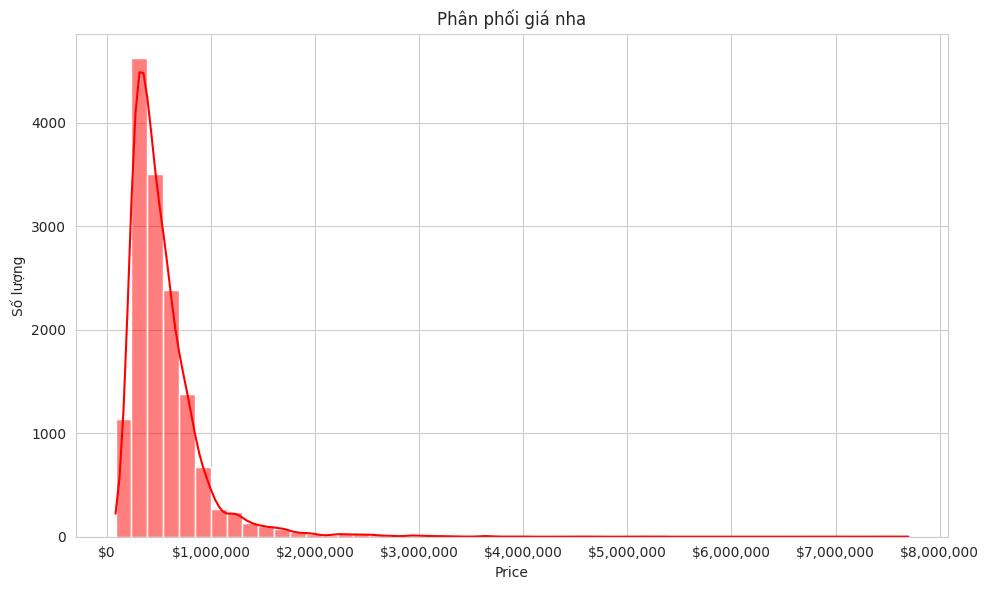

In [ ]:
import matplotlib.ticker as ticker # Import the ticker module
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_cleaned,
    x='price',
    bins=50,
    kde=True,
    color='red'
)

# Nh√£n v√† ti√™u ƒë·ªÅ
plt.title('Ph√¢n ph·ªëi gi√° nha')
plt.xlabel('Price')
plt.ylabel('S·ªë l∆∞·ª£ng')

# ƒê·ªãnh d·∫°ng tr·ª•c x th√†nh ti·ªÅn t·ªá c√≥ d·∫•u ph·∫©y
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))

plt.tight_layout()
plt.show()

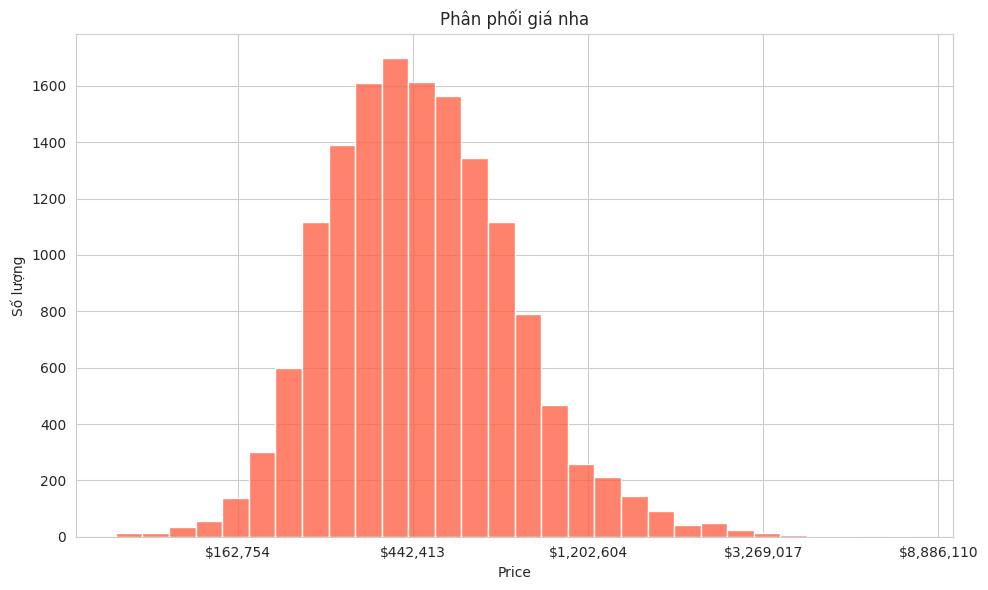

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df_cleaned['price']), bins=30, color='tomato', alpha=0.8)

# ƒê·ªãnh d·∫°ng tr·ª•c x v·ªÅ ƒë∆°n v·ªã gi√° g·ªëc
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${int(np.exp(x)):,}"))

# Nh√£n v√† ti√™u ƒë·ªÅ
plt.xlabel('Price')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.title('Ph√¢n ph·ªëi gi√° nha')
plt.tight_layout()
plt.show()

S·ª≠ d·ª•ng bi·∫øn ƒë·ªïi log (logarithmic transformation) ƒë√¢y l√† m·ªôt k·ªπ thu·∫≠t to√°n h·ªçc ƒë∆∞·ª£c s·ª≠ d·ª•ng nh·∫±m ƒëi·ªÅu ch·ªânh c√°c bi·∫øn c√≥ ph√¢n ph·ªëi l·ªách (skewed distribution) tr·ªü n√™n g·∫ßn v·ªõi ph√¢n ph·ªëi chu·∫©n h∆°n. Gi√∫p d·ªÖ ph√¢n t√≠ch h∆°n.

Gi√° nh√† ph√¢n b·ªë t·∫≠p trung trong kho·∫£ng t·ª´ 200.000 ‚Äì 800.000USD.

C√°c cƒÉn gi√° tr√™n $2 tri·ªáu l√† r·∫•t hi·∫øm, ch·ªß y·∫øu l√† bi·ªát th·ª± ho·∫∑c nh√† ·ªü c√°c khu cao c·∫•p.



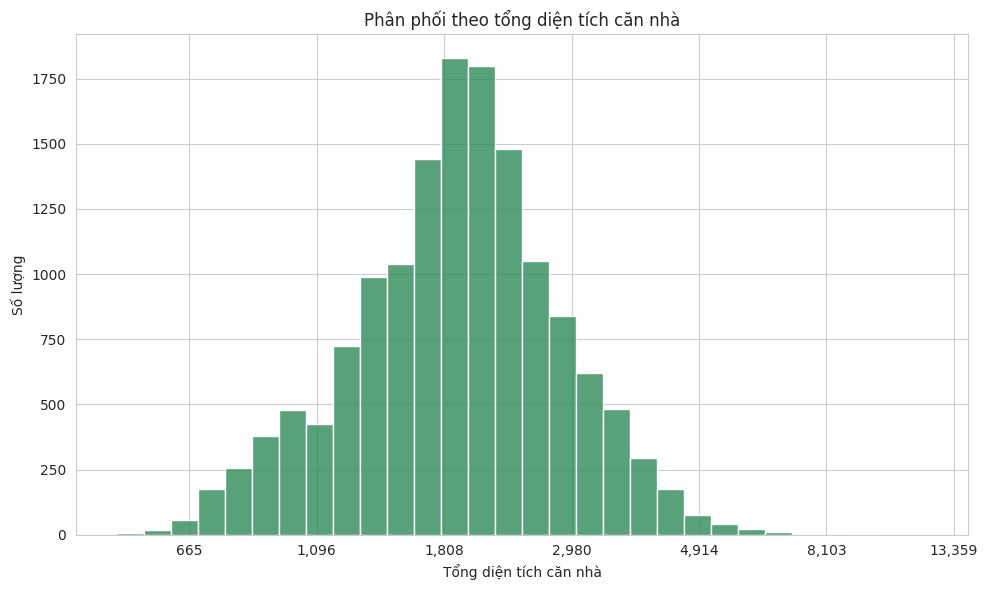

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df_cleaned['sqft_living']), bins=30, color='seagreen', alpha=0.8)

# ƒê·ªãnh d·∫°ng tr·ª•c x v·ªÅ ƒë∆°n v·ªã gi√° g·ªëc
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(np.exp(x)):,}"))


# Nh√£n v√† ti√™u ƒë·ªÅ
plt.xlabel('T·ªïng di·ªán t√≠ch cƒÉn nh√†')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.title('Ph√¢n ph·ªëi theo t·ªïng di·ªán t√≠ch cƒÉn nh√†')
plt.tight_layout()
plt.show()

Ph√¢n ph·ªëi ph·∫ßn l·ªõn t·∫≠p trung quanh m·ª©c 1.500 ‚Äì 2.500 sqft.

Nh√† di·ªán t√≠ch l·ªõn th∆∞·ªùng xu·∫•t hi·ªán √≠t h∆°n nh∆∞ng l·∫°i ƒëi k√®m v·ªõi ph√¢n kh√∫c cao c·∫•p v√† gi√° tr·ªã cao

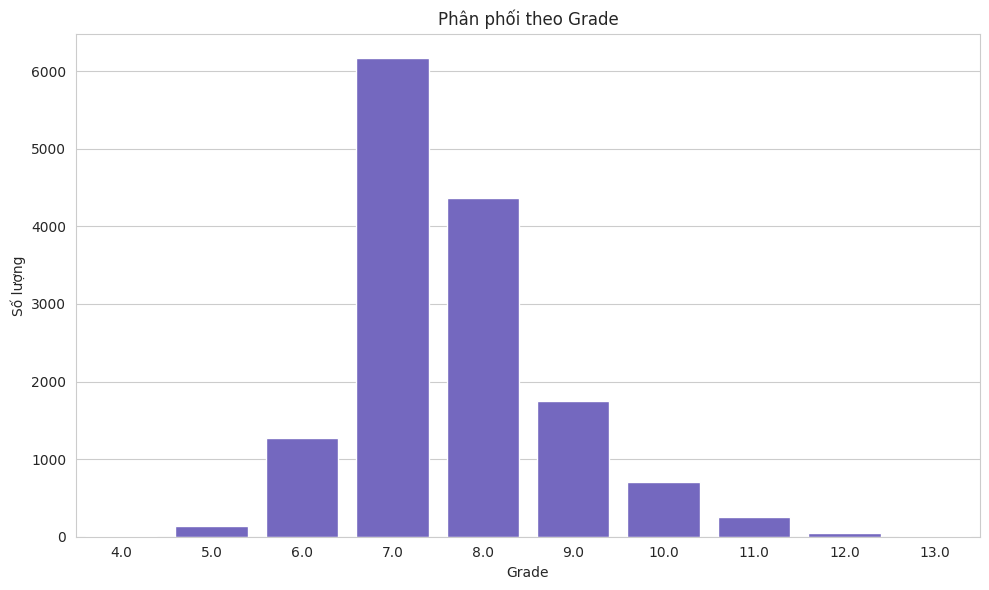

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned, x='grade', color='slateblue')
plt.xlabel('Grade')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.title('Ph√¢n ph·ªëi theo Grade')
plt.tight_layout()
plt.show()


Ph·∫ßn l·ªõn c√°c cƒÉn c√≥ ch·∫•t l∆∞·ª£ng ·ªü m·ª©c 7 v√† 8 ‚Äì ƒë√¢y l√† ph√¢n kh√∫c ph·ªï bi·∫øn, chi·∫øm ph·∫ßn l·ªõn th·ªã tr∆∞·ªùng.

C√°c cƒÉn c√≥ grade t·ª´ 10 tr·ªü l√™n r·∫•t √≠t, ƒë·∫°i di·ªán cho nh√≥m nh√† cao c·∫•p, th∆∞·ªùng c√≥ di·ªán t√≠ch l·ªõn v√† gi√° cao.

In [ ]:
import plotly.express as px
fig = px.scatter_mapbox(
    df_cleaned,
    lat="lat",
    lon="long",
    color="price",
    size="price",
    color_continuous_scale="Viridis",
    size_max=15,
    zoom=10,
    mapbox_style="carto-positron",
    title="B·∫£n ƒë·ªì gi√° nh√† theo v·ªã tr√≠",
    width=1500,         # Chi·ªÅu r·ªông
    height=1200          # Chi·ªÅu cao
)
fig.update_layout(
    title_x=0.5,  # cƒÉn gi·ªØa theo chi·ªÅu ngang
    title_font_size=28  # tƒÉng c·ª° ch·ªØ ti√™u ƒë·ªÅ
)
fig.show()


C√°c cƒÉn c√≥ gi√° tr·ªã cao t·∫≠p trung t·∫°i trung t√¢m Seattle, Bellevue v√† c√°c khu ven h·ªì ‚Äì ƒë√¢y l√† khu v·ª±c c√≥ v·ªã tr√≠ thu·∫≠n l·ª£i v√† nhi·ªÅu ti·ªán √≠ch.

C√°c v√πng xa h∆°n ho·∫∑c n√¥ng th√¥n th∆∞·ªùng c√≥ m·∫≠t ƒë·ªô nh√† th·∫•p h∆°n v√† gi√° tr·ªã nh√† c≈©ng th·∫•p h∆°n r√µ r·ªát.

Khuy·∫øn ngh·ªã:

Ng∆∞·ªùi mua:

N·∫øu t√†i ch√≠nh v·ª´a ph·∫£i, n√™n ∆∞u ti√™n nh·ªØng cƒÉn di·ªán t√≠ch ~1.800 sqft, grade 7‚Äì8 ƒë·ªÉ t·ªëi ∆∞u gi·ªØa ch·∫•t l∆∞·ª£ng v√† chi ph√≠.

Ng∆∞·ªùi b√°n:

Nh·ªØng cƒÉn di·ªán t√≠ch r·ªông, ch·∫•t l∆∞·ª£ng cao n√™n l√†m n·ªïi b·∫≠t trong marketing v√¨ c√≥ ti·ªÅm nƒÉng b√°n gi√° cao.

C√≥ th·ªÉ ƒë·∫ßu t∆∞ v√†o c·∫£i t·∫°o ƒë·ªÉ n√¢ng grade v√† t·ª´ ƒë√≥ tƒÉng gi√° tr·ªã b√°n l·∫°i.

Nh√† ƒë·∫ßu t∆∞:

C√°c khu v·ª±c quanh trung t√¢m Seattle, Bellevue, v√† g·∫ßn h·ªì l√† nh·ªØng ƒëi·ªÉm n√≥ng c√≥ ti·ªÅm nƒÉng tƒÉng gi√°.

ƒê·∫ßu t∆∞ c·∫£i t·∫°o v√†o nh√† c√≥ grade trung b√¨nh nh∆∞ng v·ªã tr√≠ t·ªët c√≥ th·ªÉ l√† chi·∫øn l∆∞·ª£c n√¢ng gi√° hi·ªáu qu·∫£.



##4.2. Gi√° nh√† theo nƒÉm x√¢y d·ª±ng v√† nh·ªØng ·∫£nh h∆∞·ªüng c·ªßa vi·ªác c·∫£i t·∫°o

/tmp/ipython-input-258-34874675.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




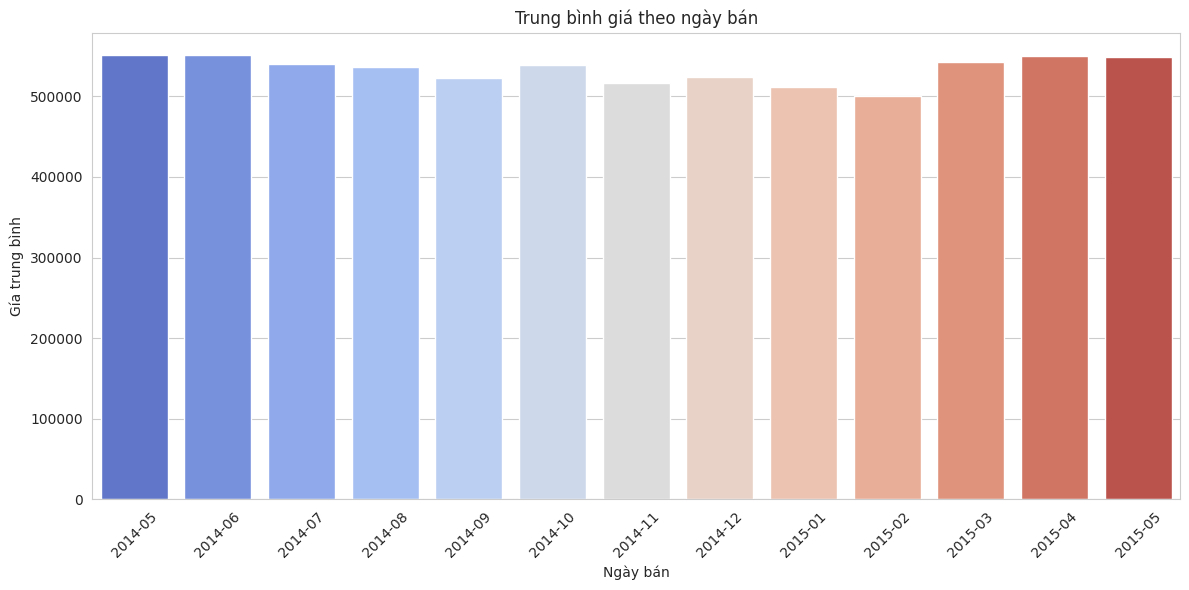

In [ ]:
# Chuy·ªÉn ng√†y sang datetime
dates = pd.to_datetime(df_cleaned['date'])

# Tr√≠ch xu·∫•t th√°ng-nƒÉm d∆∞·ªõi d·∫°ng chu·ªói: 'YYYY-MM'
month_year = dates.dt.to_period('M').astype(str)

# T√≠nh gi√° trung b√¨nh theo t·ª´ng th√°ng-nƒÉm
avg_price_by_monthyear = df_cleaned.groupby(month_year)['price'].mean().reset_index()
avg_price_by_monthyear.columns = ['month_year', 'avg_price']

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price_by_monthyear, x='month_year', y='avg_price', palette='coolwarm')

plt.title('Trung b√¨nh gi√° theo ng√†y b√°n')
plt.xlabel('Ng√†y b√°n')
plt.ylabel('G√≠a trung b√¨nh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


D·ªØ li·ªáu mua b√°n ch·ªâ k√®o d√†i 1 nƒÉm n√™n kh√¥ng c√≥ bi·∫øn ƒë·ªông g√¨ v·ªÅ gi√°.

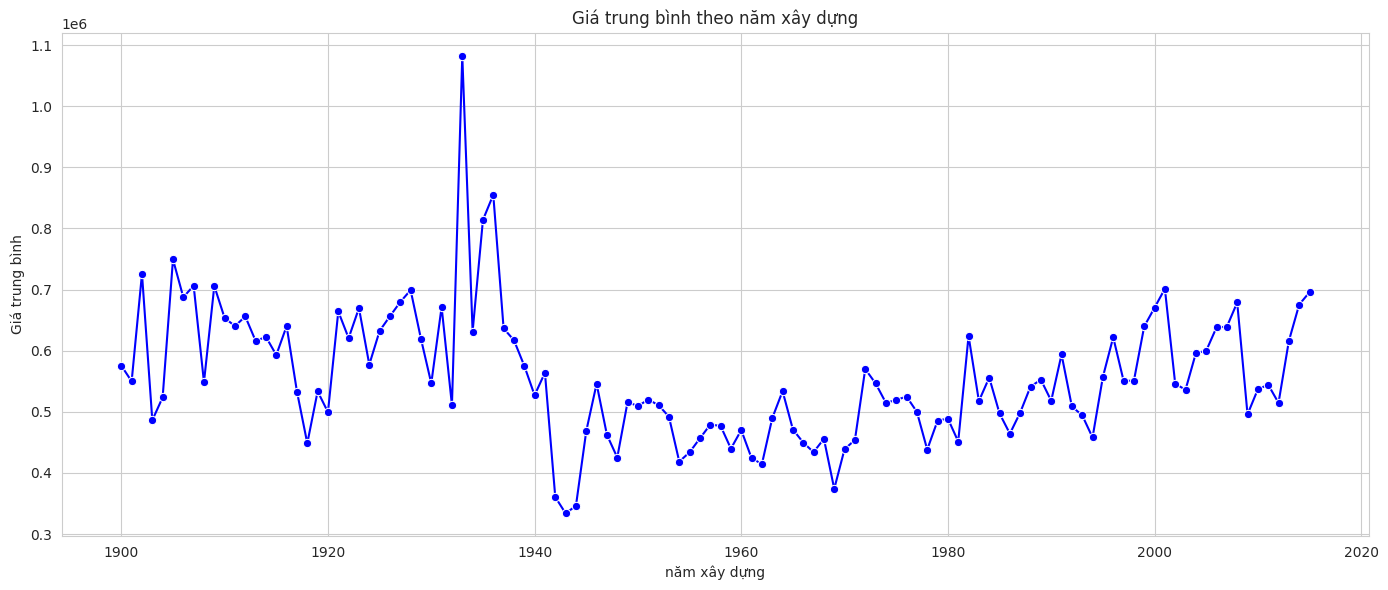

In [ ]:
# T√≠nh gi√° trung b√¨nh theo nƒÉm x√¢y d·ª±ng
avg_price_by_yr_built = df_cleaned.groupby('yr_built')['price'].mean().reset_index()

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(14,6))
sns.lineplot(data=avg_price_by_yr_built, x='yr_built', y='price', marker='o', color='blue')

plt.title('Gi√° trung b√¨nh theo nƒÉm x√¢y d·ª±ng')
plt.xlabel('nƒÉm x√¢y d·ª±ng')
plt.ylabel('Gi√° trung b√¨nh')
plt.grid(True)
plt.tight_layout()
plt.show()


Quan s√°t t·ª´ bi·ªÉu ƒë·ªì cho th·∫•y y·∫øu t·ªë nƒÉm x√¢y d·ª±ng kh√¥ng c√≥ ·∫£nh h∆∞·ªüng l·ªõn ƒë·∫øn gi√° nh√†, khi ph·∫ßn l·ªõn m·ª©c gi√° dao ƒë·ªông trong kho·∫£ng t·ª´ 400.000 ƒë·∫øn 800.000 USD, b·∫•t k·ªÉ cƒÉn nh√† ƒë∆∞·ª£c x√¢y v√†o th·ªùi ƒëi·ªÉm n√†o.

Tuy nhi√™n, giai ƒëo·∫°n 1930‚Äì1945 ghi nh·∫≠n m·ª©c gi√° trung b√¨nh bi·∫øn ƒë·ªông b·∫•t th∆∞·ªùng ‚Äì c√≥ nƒÉm gi√° cao ƒë·ªôt bi·∫øn, c√≥ nƒÉm l·∫°i gi·∫£m m·∫°nh.

ƒê·ªÉ l√Ω gi·∫£i hi·ªán t∆∞·ª£ng n√†y, em ti·∫øp t·ª•c v·∫Ω th√™m c√°c bi·ªÉu ƒë·ªì li√™n quan ƒë·∫øn ch·∫•t l∆∞·ª£ng cƒÉn nh√† (grade), v·ªã tr√≠ g·∫ßn m·∫∑t n∆∞·ªõc (waterfront) v√† t·ªïng di·ªán t√≠ch s·ª≠ d·ª•ng ‚Äì v√¨ ƒë√¢y l√† c√°c y·∫øu t·ªë c√≥ kh·∫£ nƒÉng t√°c ƒë·ªông m·∫°nh ƒë·∫øn gi√° nh√†, b·∫•t k·ªÉ th·ªùi ƒëi·ªÉm x√¢y d·ª±ng.



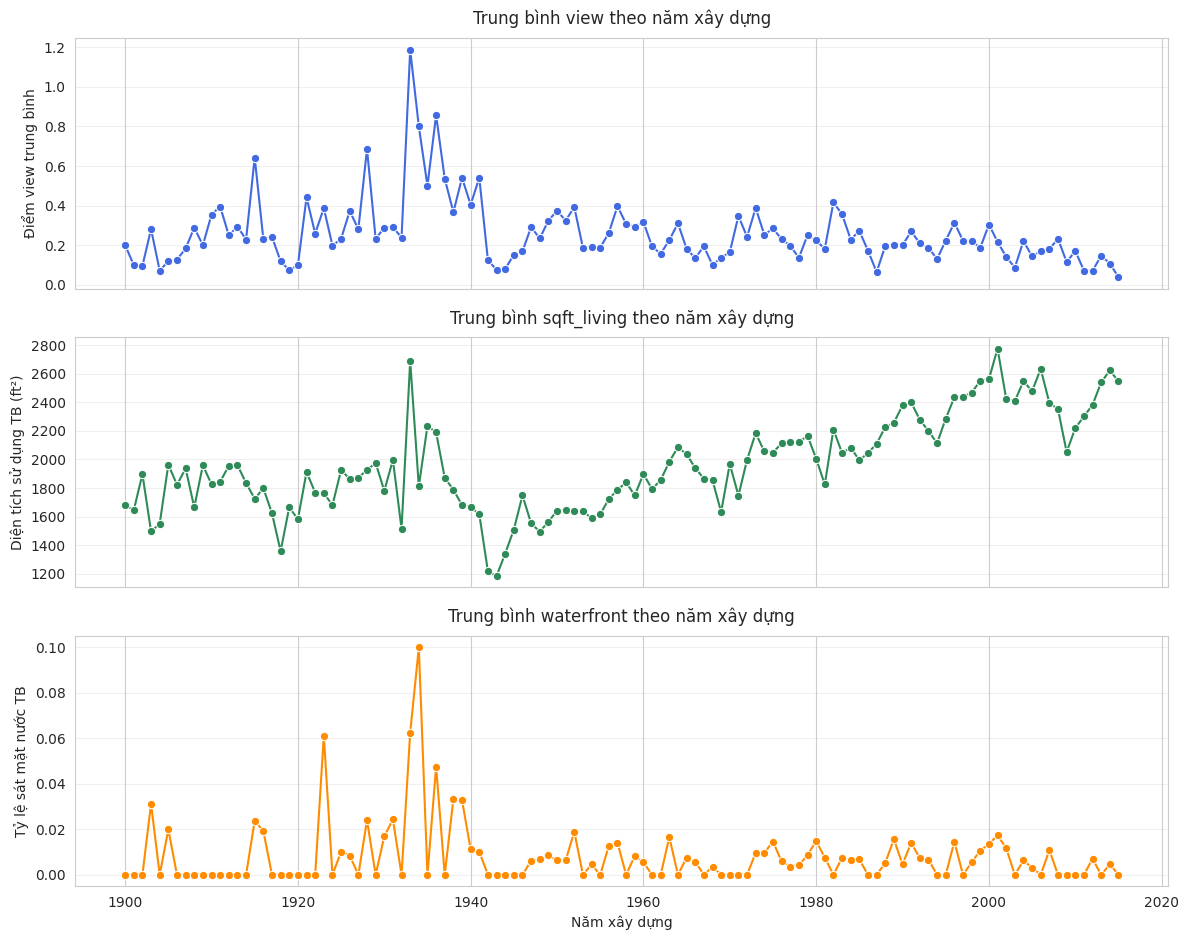

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")      # ph√¥ng n·ªÅn nh·∫π

# ----- Khai b√°o c·ªôt mu·ªën v·∫Ω & nh√£n ti·∫øng Vi·ªát -----
targets = {
    "view": {
        "color": "royalblue",
        "ylabel": "ƒêi·ªÉm view trung b√¨nh"
    },
    "sqft_living": {
        "color": "seagreen",
        "ylabel": "Di·ªán t√≠ch s·ª≠ d·ª•ng TB (ft¬≤)"
    },
    "waterfront": {
        "color": "darkorange",
        "ylabel": "T·ª∑ l·ªá s√°t m·∫∑t n∆∞·ªõc TB"
    },
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 9.5), sharex=True)

for ax, (col, opts) in zip(axes, targets.items()):
    # 1) T√≠nh gi√° tr·ªã trung b√¨nh theo nƒÉm x√¢y d·ª±ng
    avg_by_year = (
        df_cleaned.groupby('yr_built')[col]
        .mean()
        .reset_index()
    )

    # 2) V·∫Ω ƒë∆∞·ªùng
    sns.lineplot(
        data=avg_by_year,
        x='yr_built', y=col,
        marker='o', color=opts["color"],
        ax=ax
    )

    # 3) Trang tr√≠ subplot (Ti·∫øng Vi·ªát)
    ax.set_title(f"Trung b√¨nh {col} theo nƒÉm x√¢y d·ª±ng", pad=10)
    ax.set_ylabel(opts["ylabel"])
    ax.grid(True, axis='y', alpha=0.3)

# ----- Ho√†n thi·ªán b·ªë c·ª•c -----
axes[-1].set_xlabel("NƒÉm x√¢y d·ª±ng")
plt.tight_layout()
plt.show()


Ba bi·ªÉu ƒë·ªì b·ªï sung g·ªìm ch·∫•t l∆∞·ª£ng cƒÉn nh√† (grade), v·ªã tr√≠ g·∫ßn m·∫∑t n∆∞·ªõc (waterfront) v√† t·ªïng di·ªán t√≠ch cƒÉn nh√† (sqft_living) cho th·∫•y s·ª± t∆∞∆°ng ƒë·ªìng ƒë√°ng k·ªÉ v·ªõi xu h∆∞·ªõng gi√° nh√† theo nƒÉm x√¢y d·ª±ng.

C·ª• th·ªÉ, nh·ªØng bi·∫øn ƒë·ªông b·∫•t th∆∞·ªùng trong kho·∫£ng nƒÉm 1930‚Äì1945 tr√™n bi·ªÉu ƒë·ªì gi√° nh√† ‚Äì v·ªõi c√°c m·ª©c gi√° trung b√¨nh ƒë·ªôt ng·ªôt tƒÉng cao ho·∫∑c gi·∫£m m·∫°nh ‚Äì c≈©ng xu·∫•t hi·ªán ·ªü c√°c bi·ªÉu ƒë·ªì c√≤n l·∫°i. M·ªôt s·ªë cƒÉn nh√† trong giai ƒëo·∫°n n√†y c√≥ di·ªán t√≠ch l·ªõn v∆∞·ª£t tr·ªôi, ch·∫•t l∆∞·ª£ng x√¢y d·ª±ng cao (grade cao), ho·∫∑c n·∫±m g·∫ßn m·∫∑t n∆∞·ªõc, v·ªën l√† c√°c y·∫øu t·ªë c√≥ ·∫£nh h∆∞·ªüng m·∫°nh m·∫Ω ƒë·∫øn gi√° b√°n.

ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng gi√° nh√† t·∫°i m·ªôt s·ªë th·ªùi ƒëi·ªÉm kh√¥ng ch·ªâ ph·ª• thu·ªôc v√†o nƒÉm x√¢y d·ª±ng, m√† c√≤n b·ªã chi ph·ªëi b·ªüi c√°c ƒë·∫∑c ƒëi·ªÉm n·ªôi t·∫°i kh√°c c·ªßa b·∫•t ƒë·ªông s·∫£n nh∆∞ ch·∫•t l∆∞·ª£ng, di·ªán t√≠ch v√† v·ªã tr√≠.

Do ƒë√≥, nh·ªØng ƒëi·ªÉm ‚Äúngo·∫°i l·ªá‚Äù v·ªÅ gi√° trong giai ƒëo·∫°n n√†y kh√¥ng nh·∫•t thi·∫øt ph·∫£n √°nh t√°c ƒë·ªông c·ªßa y·∫øu t·ªë th·ªùi gian, m√† l√† h·ªá qu·∫£ c·ªßa c√°c ƒë·∫∑c ƒëi·ªÉm v·∫≠t l√Ω v√† v·ªã tr√≠ c·ª• th·ªÉ c·ªßa t·ª´ng cƒÉn nh√† ‚Äì t·ª´ ƒë√≥ l√†m r√µ th√™m m·ªëi quan h·ªá gi·ªØa c√°c y·∫øu t·ªë v√† gi√∫p tr√°nh hi·ªÉu nh·∫ßm khi ƒë√°nh gi√° d·ªØ li·ªáu theo t·ª´ng bi·∫øn ƒë·ªôc l·∫≠p.

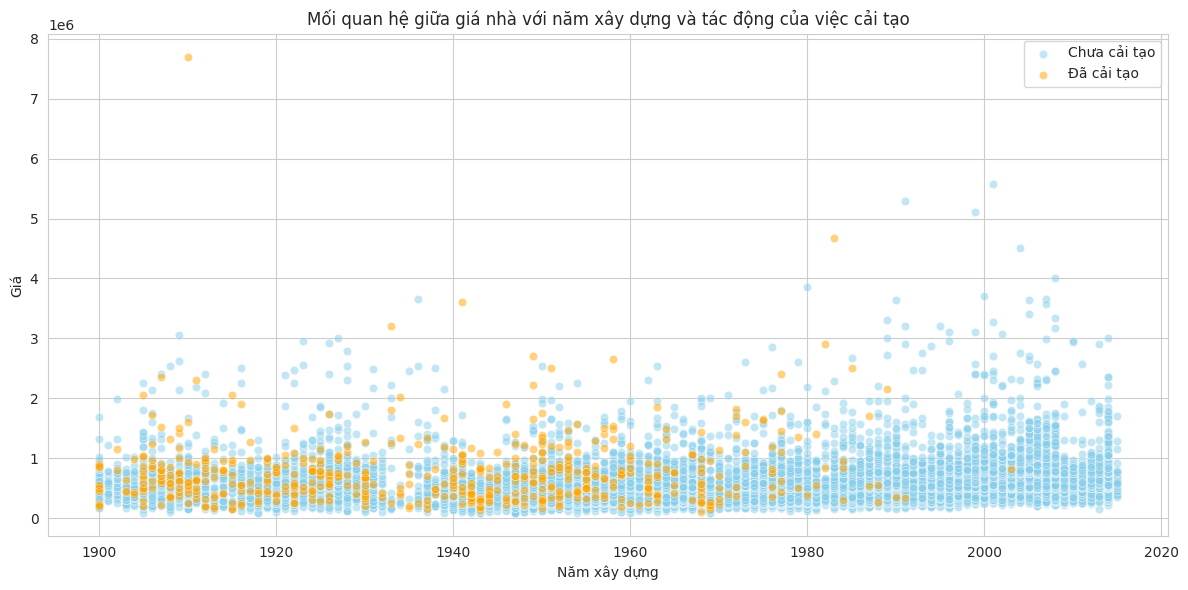

In [ ]:
plt.figure(figsize=(12, 6))

# V·∫Ω ƒëi·ªÉm ch∆∞a t·ª´ng renovate (yr_renovated == 0 ho·∫∑c 1)
sns.scatterplot(
    data=df_cleaned[df_cleaned['yr_renovated'] == 0],
    x='yr_built', y='price',
    color='skyblue', label='Ch∆∞a c·∫£i t·∫°o', alpha=0.5
)

# V·∫Ω ƒëi·ªÉm ƒë√£ renovate (yr_renovated > 1)
sns.scatterplot(
    data=df_cleaned[df_cleaned['yr_renovated'] > 1],
    x='yr_built', y='price',
    color='orange', label='ƒê√£ c·∫£i t·∫°o', alpha=0.5
)

# Nh√£n v√† ti√™u ƒë·ªÅ
plt.title('M·ªëi quan h·ªá gi·ªØa gi√° nh√† v·ªõi nƒÉm x√¢y d·ª±ng v√† t√°c ƒë·ªông c·ªßa vi·ªác c·∫£i t·∫°o')
plt.xlabel('NƒÉm x√¢y d·ª±ng')
plt.ylabel('Gi√°')
plt.legend()
plt.tight_layout()
plt.show()

D·ª±a v√†o bi·ªÉu ƒë·ªì ph√¢n t√°n th·ªÉ hi·ªán m·ªëi quan h·ªá gi·ªØa nƒÉm x√¢y d·ª±ng v√† gi√° nh√† theo hai nh√≥m ‚Äúƒë√£ c·∫£i t·∫°o‚Äù v√† ‚Äúch∆∞a c·∫£i t·∫°o‚Äù, c√≥ th·ªÉ nh·∫≠n th·∫•y r·∫±ng nh·ªØng cƒÉn nh√† ƒë∆∞·ª£c c·∫£i t·∫°o tr∆∞·ªõc nƒÉm 1980 th∆∞·ªùng c√≥ m·ª©c gi√° cao h∆°n so v·ªõi nh·ªØng cƒÉn ch∆∞a c·∫£i t·∫°o c√πng th·ªùi ƒëi·ªÉm.

ƒê·∫∑c bi·ªát, nhi·ªÅu cƒÉn nh√† x√¢y d·ª±ng tr∆∞·ªõc nƒÉm 1980 v·∫´n ƒë·∫°t m·ª©c gi√° t·ª´ 2 tri·ªáu USD tr·ªü l√™n, cho th·∫•y vi·ªác c·∫£i t·∫°o c√≥ th·ªÉ gi√∫p gia tƒÉng ƒë√°ng k·ªÉ gi√° tr·ªã t√†i s·∫£n, ngay c·∫£ ƒë·ªëi v·ªõi c√°c c√¥ng tr√¨nh ƒë√£ c≈©. ƒêi·ªÅu n√†y c·ªßng c·ªë nh·∫≠n ƒë·ªãnh r·∫±ng y·∫øu t·ªë c·∫£i t·∫°o ƒë√≥ng vai tr√≤ quan tr·ªçng ƒë·∫øn gi√° tr·ªã nh√†.

/tmp/ipython-input-262-1556995466.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




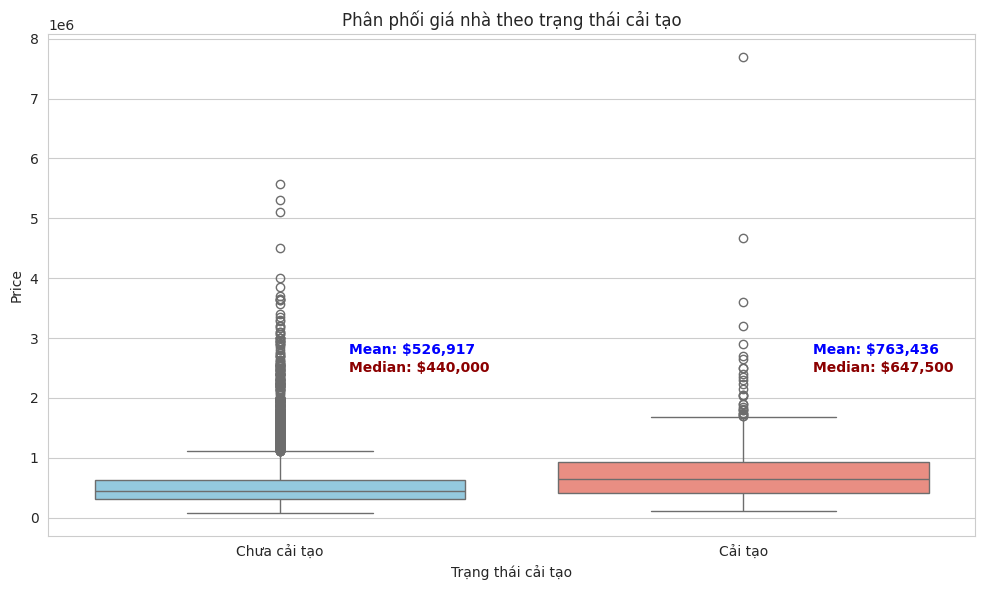

In [ ]:
# T·∫°o b·∫£n sao t·∫°m th·ªùi v·ªõi c·ªôt 'renovated_status' d√πng ƒë·ªÉ v·∫Ω
df_viz = df_cleaned.copy()
df_viz['renovated_status'] = df_viz['yr_renovated'].apply(lambda x: 'C·∫£i t·∫°o' if x > 1 else 'Ch∆∞a c·∫£i t·∫°o')

# V·∫Ω boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_viz,
    x='renovated_status',  # Corrected column name
    y='price',
    palette=['skyblue', 'salmon']
)

# T√≠nh trung b√¨nh & trung v·ªã
grouped = df_viz.groupby('renovated_status')['price'].agg(['mean', 'median'])

# Ghi ch√∫ mean/median
ymin, ymax = ax.get_ylim()
y_text = ymax - 0.65 * (ymax - ymin)
offset = 0.15

for i, status in enumerate(grouped.index):
    mean_val = int(grouped.loc[status, 'mean'])
    median_val = int(grouped.loc[status, 'median'])

    ax.text(i + offset, y_text + 100000, f"Mean: ${mean_val:,}", color='blue', fontsize=10, weight='bold')
    ax.text(i + offset, y_text - 200000, f"Median: ${median_val:,}", color='darkred', fontsize=10, weight='bold')

# Nh√£n & ti√™u ƒë·ªÅ
plt.title('Ph√¢n ph·ªëi gi√° nh√† theo tr·∫°ng th√°i c·∫£i t·∫°o')
plt.xlabel('Tr·∫°ng th√°i c·∫£i t·∫°o')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

Bi·ªÉu ƒë·ªì boxplot th·ªÉ hi·ªán s·ª± kh√°c bi·ªát r√µ r·ªát v·ªÅ gi√° nh√† gi·ªØa hai nh√≥m ‚Äúƒë√£ c·∫£i t·∫°o‚Äù v√† ‚Äúch∆∞a c·∫£i t·∫°o‚Äù. C·ª• th·ªÉ, gi√° trung b√¨nh (mean) c·ªßa nh√≥m ƒë√£ c·∫£i t·∫°o cao h∆°n kho·∫£ng 236,000 USD, trong khi gi√° trung v·ªã (median) c≈©ng tƒÉng th√™m h∆°n 200,000 USD. ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng vi·ªác c·∫£i t·∫°o kh√¥ng ch·ªâ n√¢ng cao gi√° tr·ªã trung b√¨nh m√† c√≤n ƒë·∫©y m·∫∑t b·∫±ng gi√° chung l√™n ƒë√°ng k·ªÉ, kh·∫≥ng ƒë·ªãnh vai tr√≤ quan tr·ªçng c·ªßa c·∫£i t·∫°o trong vi·ªác gia tƒÉng gi√° tr·ªã b·∫•t ƒë·ªông s·∫£n.

/tmp/ipython-input-263-3887753282.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



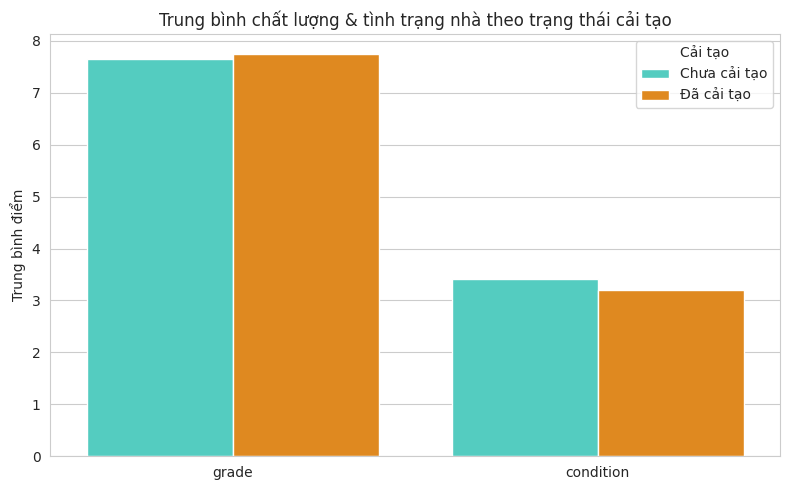

In [ ]:
avg_values = (
    df_cleaned
    .assign(renovated=lambda d: (d['yr_renovated'] > 0).astype(int))          # 0 = No, 1 = Yes
    .groupby('renovated')[['grade', 'condition']]
    .mean()
    .reset_index()
)

# 2. Melt ƒë·ªÉ v·∫Ω seaborn
avg_melt = avg_values.melt(id_vars='renovated', var_name='Feature', value_name='Average')

# 3. Palette r√µ r√†ng cho 2 tr·∫°ng th√°i
palette = {0: 'turquoise', 1: 'darkorange'}

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=avg_melt,
    x='Feature', y='Average',
    hue='renovated', palette=palette
)
# 4. Vi·ªát ho√° & trang tr√≠
ax.set_title('Trung b√¨nh ch·∫•t l∆∞·ª£ng & t√¨nh tr·∫°ng nh√† theo tr·∫°ng th√°i c·∫£i t·∫°o')
ax.set_xlabel('')
ax.set_ylabel('Trung b√¨nh ƒëi·ªÉm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# 5. T·∫°o l·∫°i legend m√†u s·∫Øc
legend_labels = ['Ch∆∞a c·∫£i t·∫°o', 'ƒê√£ c·∫£i t·∫°o']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title='C·∫£i t·∫°o', loc='upper right')
plt.tight_layout()
plt.show()


Khi ph√¢n t√≠ch th√™m bi·ªÉu ƒë·ªì c·ªôt th·ªÉ hi·ªán m·ªëi li√™n h·ªá gi·ªØa vi·ªác c·∫£i t·∫°o v·ªõi hai y·∫øu t·ªë ch·∫•t l∆∞·ª£ng nh√† (grade) v√† ƒëi·ªÅu ki·ªán v·∫≠t l√Ω (condition), c√≥ th·ªÉ th·∫•y r·∫±ng t·ªâ l·ªá c√°c c·∫•p ƒë·ªô ·ªü c·∫£ hai ƒë·∫∑c ƒëi·ªÉm n√†y g·∫ßn nh∆∞ kh√¥ng thay ƒë·ªïi gi·ªØa nh√≥m ƒë√£ c·∫£i t·∫°o v√† ch∆∞a c·∫£i t·∫°o. Tuy nhi√™n, ·ªü 2 bi·ªÉu ƒë·ªì ·ªü ph√≠a d∆∞·ªõi ƒë·ªÅu ƒë∆∞·ª£c ch·ª©ng minh c·∫£ ‚Äúgrade‚Äù v√† ‚Äúcondition‚Äù  l√† c√≥ ·∫£nh h∆∞·ªüng m·∫°nh ƒë·∫øn gi√° nh√†.

S·ª± ch√™nh l·ªách v·ªÅ gi√° gi·ªØa hai nh√≥m c·∫£i t·∫°o v√† ch∆∞a c·∫£i t·∫°o, trong khi c√°c ƒë·∫∑c ƒëi·ªÉm ch·∫•t l∆∞·ª£ng kh√¥ng ƒë·ªïi, cho th·∫•y r·∫±ng ng∆∞·ªùi mua c√≥ xu h∆∞·ªõng ƒë√°nh gi√° cao nh·ªØng cƒÉn nh√† ƒë√£ c·∫£i t·∫°o, c√≥ th·ªÉ do y·∫øu t·ªë t√¢m l√Ω ho·∫∑c c·∫£m nh·∫≠n v·ªÅ t√≠nh m·ªõi v√† s·∫µn s√†ng chi tr·∫£ m·ª©c gi√° cao h∆°n. Tuy nhi√™n, m·ª©c gi√° n√†y c√≥ kh·∫£ nƒÉng v∆∞·ª£t qu√° gi√° tr·ªã th·ª±c d·ª±a tr√™n c√°c y·∫øu t·ªë v·∫≠t l√Ω c·ªët l√µi.

V·ªÅ ph√≠a ng∆∞·ªùi b√°n, n·∫øu kh√¥ng mu·ªën ƒë·∫ßu t∆∞ qu√° nhi·ªÅu chi ph√≠ v√†o n√¢ng c·∫•p c·∫•u tr√∫c, h√£y ch√∫ tr·ªçng ƒë·∫øn c·∫£i t·∫°o th·∫©m m·ªπ, ch·ªânh trang kh√¥ng gian v·∫´n c√≥ th·ªÉ t·∫°o ƒë∆∞·ª£c ·∫•n t∆∞·ª£ng t·ªët v√† b√°n ƒë∆∞·ª£c v·ªõi gi√° cao h∆°n k·ª≥ v·ªçng, nh·ªù v√†o t√°c ƒë·ªông t√¢m l√Ω c·ªßa ng∆∞·ªùi mua ƒë·ªëi v·ªõi tr·∫°ng th√°i ‚Äúƒë√£ c·∫£i t·∫°o‚Äù.











/tmp/ipython-input-264-2965606323.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-264-2965606323.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




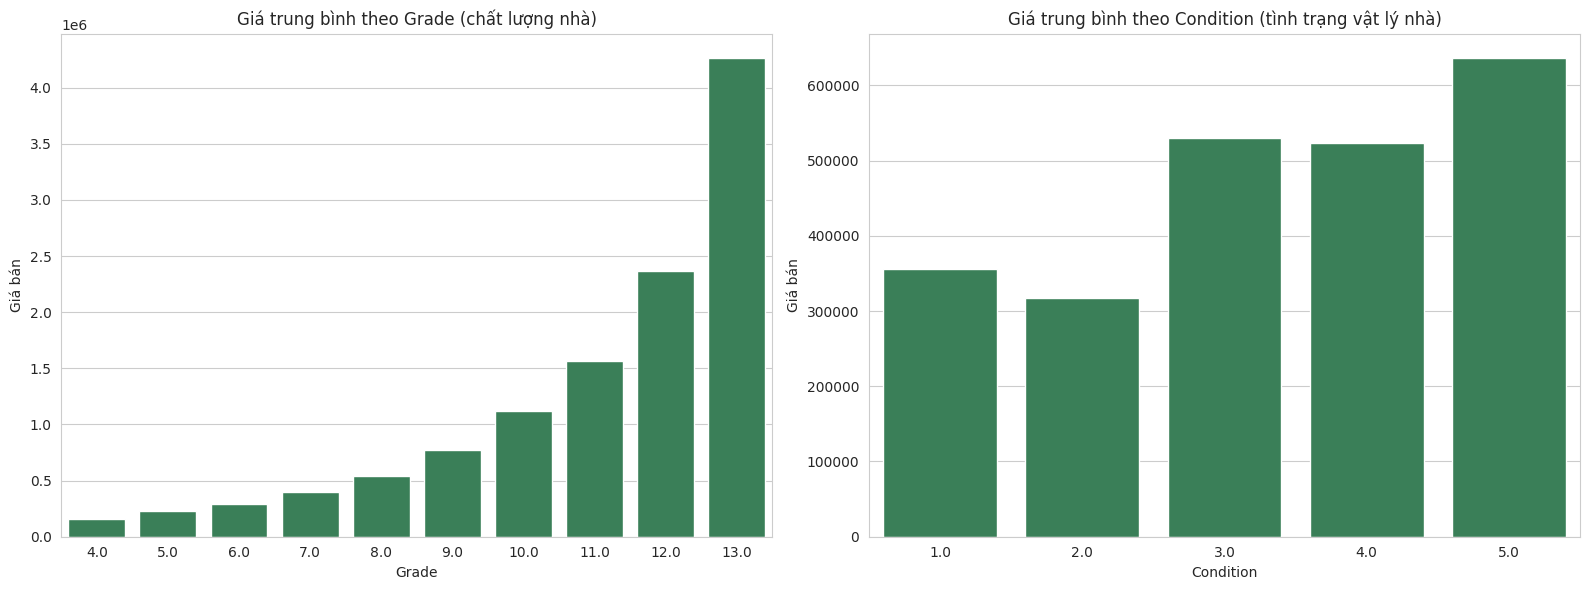

In [ ]:
# T·∫°o khung v·∫Ω v·ªõi 1 d√≤ng, 2 c·ªôt
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bi·ªÉu ƒë·ªì trung b√¨nh price theo grade
sns.barplot(data=df_cleaned, x='grade', y='price', ax=axes[0], ci=None, color='seagreen')
axes[0].set_title('Gi√° trung b√¨nh theo Grade (ch·∫•t l∆∞·ª£ng nh√†)')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Gi√° b√°n')

# Bi·ªÉu ƒë·ªì trung b√¨nh price theo condition
sns.barplot(data=df_cleaned, x='condition', y='price', ax=axes[1], ci=None, color='seagreen')
axes[1].set_title('Gi√° trung b√¨nh theo Condition (t√¨nh tr·∫°ng v·∫≠t l√Ω nh√†)')
axes[1].set_xlabel('Condition')
axes[1].set_ylabel('Gi√° b√°n')

# CƒÉn ch·ªânh v√† hi·ªÉn th·ªã
plt.tight_layout()
plt.show()


C·∫£ 2 bi·ªÉu ƒë·ªì ƒë·ªÅu cho th·∫•y khi thang ƒëi·ªÉm v·ªÅ Grade v√† Condition tƒÉng th√¨ gi√° nh√† c≈©ng tƒÉng l√™n ƒë√°ng k·ªÉ.

##4.3. C·∫•u tr√∫c di·ªán t√≠ch ƒë·∫•t v√† t√°c ƒë·ªông c·ªßa ch√∫ng ƒë·∫øn ƒë·∫∑c t√≠nh c≈©ng nh∆∞ gi√° tr·ªã cƒÉn nh√†

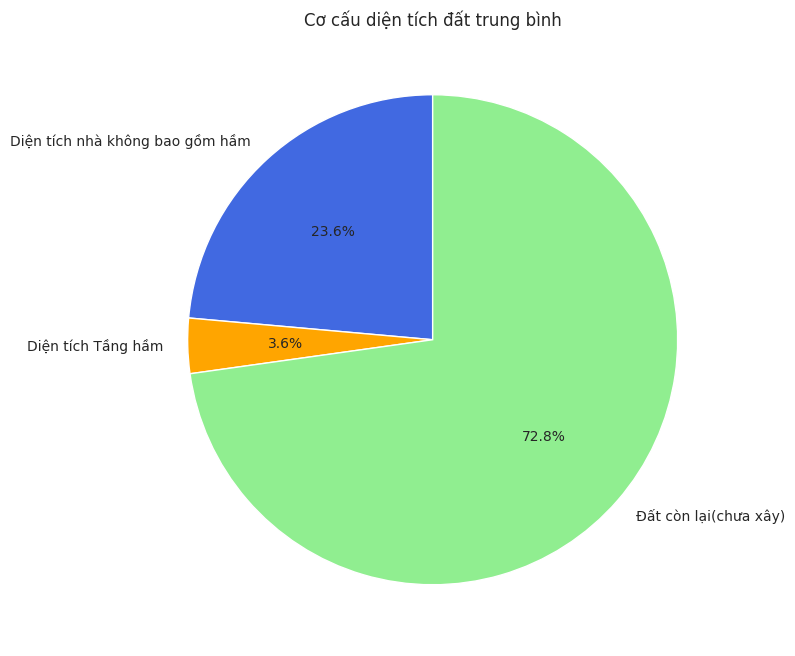

In [ ]:
# T√≠nh trung b√¨nh c√°c ph·∫ßn
avg_lot = df_cleaned['sqft_lot'].mean()
avg_above = df_cleaned['sqft_above'].mean()
avg_basement = df_cleaned['sqft_basement'].mean()
avg_built = avg_above + avg_basement
avg_unbuilt = avg_lot - avg_built

# D·ªØ li·ªáu v·∫Ω
sizes = [avg_above, avg_basement, avg_unbuilt]
labels = ['Di·ªán t√≠ch nh√† kh√¥ng bao g·ªìm h·∫ßm', 'Di·ªán t√≠ch T·∫ßng h·∫ßm', 'ƒê·∫•t c√≤n l·∫°i(ch∆∞a x√¢y)']
colors = ['royalblue', 'orange', 'lightgreen']

# V·∫Ω bi·ªÉu ƒë·ªì tr√≤n
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('C∆° c·∫•u di·ªán t√≠ch ƒë·∫•t trung b√¨nh' )
plt.tight_layout()
plt.show()


Bi·ªÉu ƒë·ªì cho th·∫•y c∆° c·∫•u di·ªán t√≠ch ƒë·∫•t trung b√¨nh ƒë∆∞·ª£c s·ª≠ d·ª•ng nh∆∞ sau: ph·∫ßn l·ªõn di·ªán t√≠ch ƒë·∫•t (72.8%) v·∫´n ch∆∞a ƒë∆∞·ª£c x√¢y d·ª±ng, ch·ªâ kho·∫£ng 23.6% d√†nh cho di·ªán t√≠ch nh√† (kh√¥ng bao g·ªìm t·∫ßng h·∫ßm), v√† t·∫ßng h·∫ßm chi·∫øm t·ª∑ l·ªá nh·ªè nh·∫•t v·ªõi 3.6%.

Seattle v√† c√°c v√πng ngo·∫°i √¥ l√¢n c·∫≠n (nh∆∞ Bellevue) th∆∞·ªùng theo phong c√°ch quy ho·∫°ch ƒë√¥ th·ªã th∆∞a (low-density zoning), t·ª©c l√† m·ªói cƒÉn nh√† ƒë∆∞·ª£c x√¢y tr√™n l√¥ ƒë·∫•t r·ªông, ƒë·ªÉ l·∫°i nhi·ªÅu kho·∫£ng tr·ªëng l√†m s√¢n v∆∞·ªùn, gara, ho·∫∑c ƒë·∫•t ch∆∞a x√¢y.


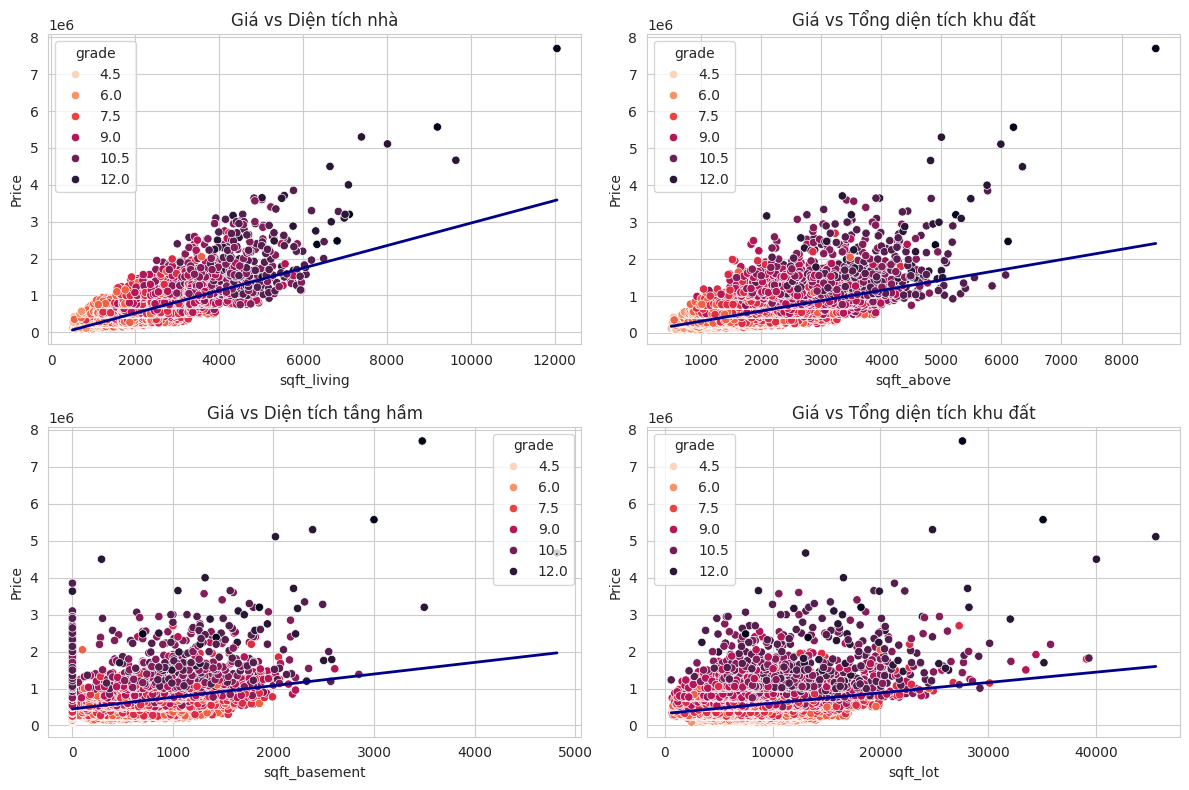

In [ ]:
# T·∫°o khung 2x2 cho 4 bi·ªÉu ƒë·ªì
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 h√†ng 2 c·ªôt
axes = axes.flatten()  # chuy·ªÉn v·ªÅ m·∫£ng 1 chi·ªÅu ƒë·ªÉ d·ªÖ truy c·∫≠p

# Danh s√°ch c√°c c·∫∑p tr·ª•c x c·∫ßn v·∫Ω
x_vars = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot']
titles = ['Gi√° vs Di·ªán t√≠ch nh√†', 'Gi√° vs T·ªïng di·ªán t√≠ch khu ƒë·∫•t', 'Gi√° vs Di·ªán t√≠ch t·∫ßng h·∫ßm', 'Gi√° vs T·ªïng di·ªán t√≠ch khu ƒë·∫•t']

# V·∫Ω t·ª´ng bi·ªÉu ƒë·ªì
for i, (x_var, ax) in enumerate(zip(x_vars, axes)):
    # V·∫Ω scatterplot
    sns.scatterplot(
        data=df_cleaned,
        x=x_var,
        y='price',
        hue='grade',
        palette='rocket_r',
        ax=ax
    )

    # V·∫Ω ƒë∆∞·ªùng h·ªìi quy tuy·∫øn t√≠nh
    sns.regplot(
        data=df_cleaned,
        x=x_var,
        y='price',
        scatter=False,
        color='darkblue',  # m√†u ƒë∆∞·ªùng
        line_kws={'linewidth': 2},  # ƒë·ªô d√†y ƒë∆∞·ªùng
        ci=None,  # t·∫Øt v√πng tin c·∫≠y
        ax=ax
    )

    # ƒê·∫∑t ti√™u ƒë·ªÅ
    ax.set_title(titles[i])
    ax.set_xlabel(x_var)
    ax.set_ylabel("Price")

# Canh l·ªÅ ƒë·∫πp
plt.tight_layout()
plt.show()


C√°c bi·ªÉu ƒë·ªì tr√™n cho th·∫•y di·ªán t√≠ch l√† y·∫øu t·ªë ·∫£nh h∆∞·ªüng r√µ r·ªát ƒë·∫øn gi√° nh√†. Trong ƒë√≥, di·ªán t√≠ch nh√† (sqft_living) c√≥ t∆∞∆°ng quan m·∫°nh nh·∫•t ‚Äì di·ªán t√≠ch c√†ng l·ªõn, gi√° c√†ng cao, ƒë·∫∑c bi·ªát ·ªü nh·ªØng cƒÉn c√≥ grade cao. Di·ªán t√≠ch kh√¥ng bao g·ªìm t·∫ßng h·∫ßm (sqft_above) c≈©ng c√≥ xu h∆∞·ªõng t∆∞∆°ng t·ª±. V·ªÅ di·ªán t√≠ch t·∫ßng h·∫ßm v√† t·ªïng di·ªán t√≠ch ƒë·∫•t tuy c√≥ ·∫£nh h∆∞·ªüng nh∆∞ng ph√¢n t√°n c√≤n kh√° nhi·ªÅu.

Sau khi ph√¢n t√≠ch c√°c bi·∫øn li√™n quan ƒë·∫øn di·ªán t√≠ch, c√≥ th·ªÉ th·∫•y ng∆∞·ªùi mua th∆∞·ªùng ∆∞u ti√™n di·ªán t√≠ch s·ª≠ d·ª•ng th·ª±c t·∫ø (nh∆∞ di·ªán t√≠ch sinh ho·∫°t) h∆°n l√† t·ªïng di·ªán t√≠ch khu ƒë·∫•t. Tuy nhi√™n, nh·ªØng l√¥ ƒë·∫•t r·ªông v·∫´n mang l·∫°i ti·ªÅm nƒÉng ƒë·∫ßu t∆∞ l·ªõn nh·ªù ph·∫ßn ƒë·∫•t tr·ªëng c√≥ th·ªÉ d√πng ƒë·ªÉ m·ªü r·ªông, x√¢y d·ª±ng ho·∫∑c ph√°t tri·ªÉn trong t∆∞∆°ng lai. ƒê√¢y l√† v·∫•n ƒë·ªÅ ng∆∞·ªùi mua ho·∫∑c nh√† ƒë·∫ßu t∆∞ c√≥ th·ªÉ c√¢n nh·∫Øc.

Trong khi ƒë√≥, ng∆∞·ªùi b√°n v√† m√¥ gi·ªõi c√≥ th·ªÉ nh·∫•n m·∫°nh ti·ªÅm nƒÉng ph√°t tri·ªÉn c·ªßa khu ƒë·∫•t v·ªÅ l√¢u d√†i trong chi·∫øn l∆∞·ª£c qu·∫£ng b√° ƒë·ªÉ n√¢ng cao gi√° tr·ªã cƒÉn nh√† trong m·∫Øt ng∆∞·ªùi mua.

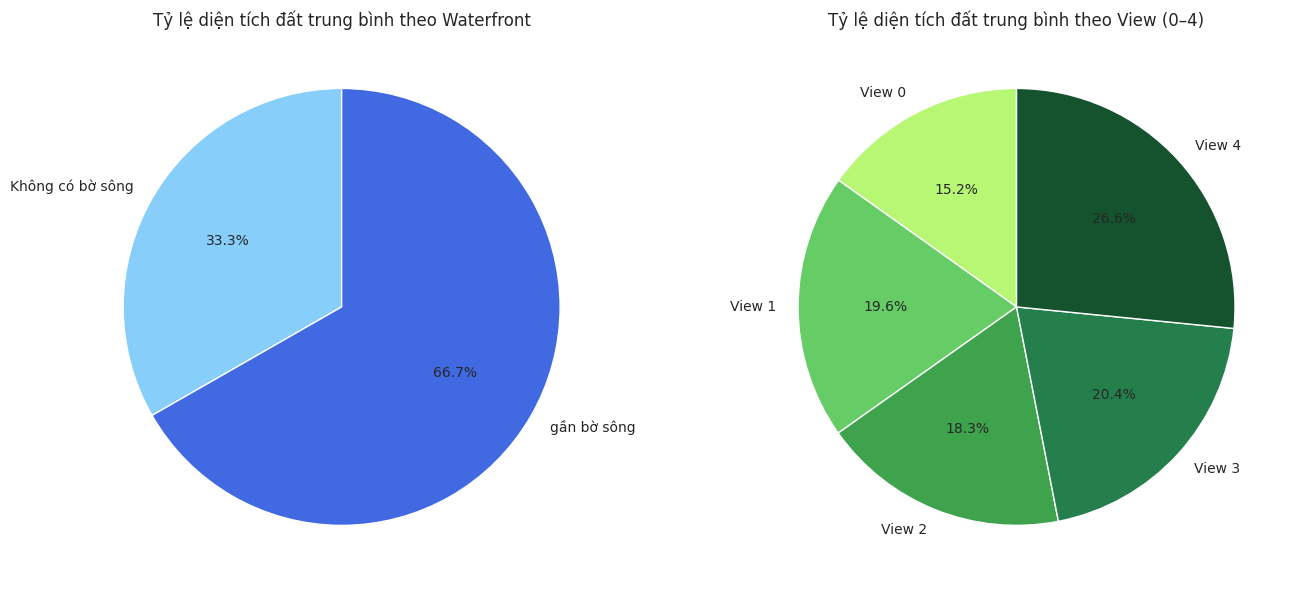

In [ ]:
# T√≠nh trung b√¨nh sqft_lot theo waterfront
lot_by_waterfront = df_cleaned.groupby('waterfront')['sqft_lot'].mean()

# T√≠nh trung b√¨nh sqft_lot theo view
lot_by_view = df_cleaned.groupby('view')['sqft_lot'].mean()

# Danh s√°ch m√†u ƒë·∫πp (tu·ª≥ ch·ªânh th·ªß c√¥ng)
view_colors = ['#b7f774', '#66cc66', '#3fa34d', '#247f4d', '#14532d']
wf_colors = ['lightskyblue','royalblue']

# V·∫Ω 2 bi·ªÉu ƒë·ªì tr√≤n c·∫°nh nhau
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bi·ªÉu ƒë·ªì 1: Waterfront
axes[0].pie(lot_by_waterfront,
            labels=['Kh√¥ng c√≥ b·ªù s√¥ng', 'g·∫ßn b·ªù s√¥ng'],
            autopct='%1.1f%%',
            startangle=90,
            colors=wf_colors)
axes[0].set_title('T·ª∑ l·ªá di·ªán t√≠ch ƒë·∫•t trung b√¨nh theo Waterfront')

# Bi·ªÉu ƒë·ªì 2: View (0‚Äì4)
view_labels = [f'View {int(i)}' for i in lot_by_view.index]
axes[1].pie(lot_by_view,
            labels=view_labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=view_colors)
axes[1].set_title('T·ª∑ l·ªá di·ªán t√≠ch ƒë·∫•t trung b√¨nh theo View (0‚Äì4)')

plt.tight_layout()
plt.show()


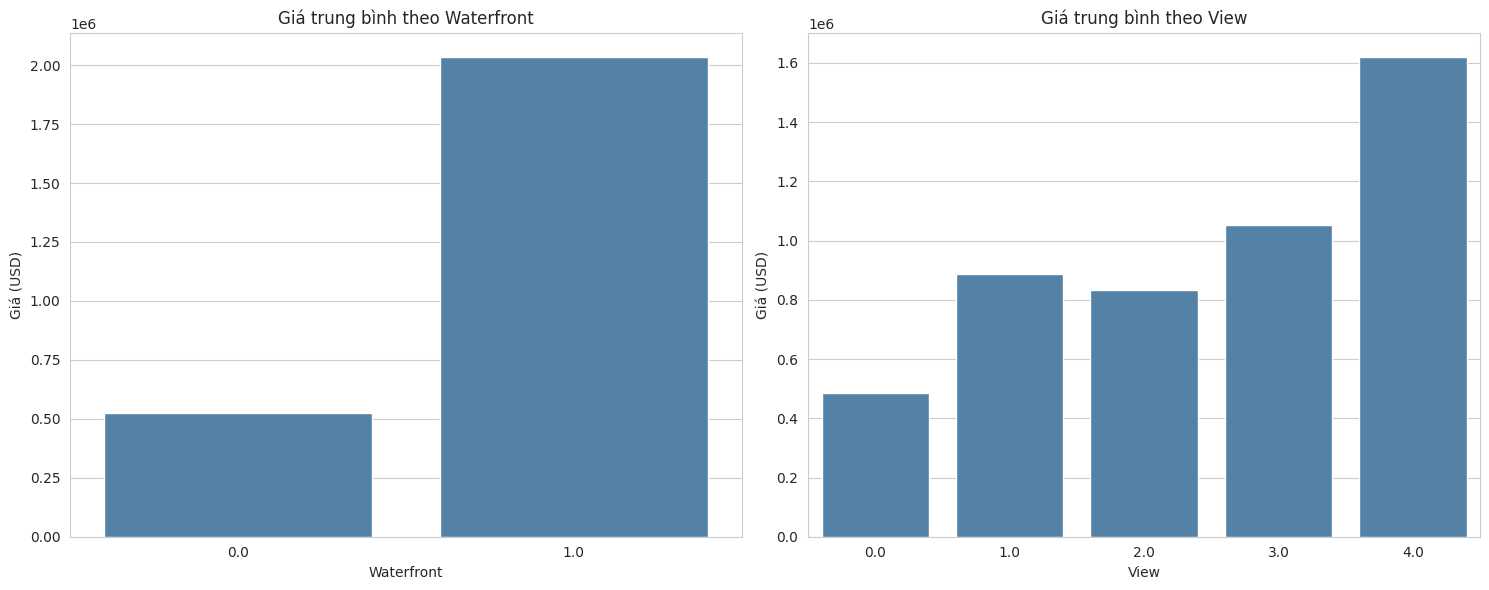

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# C√°c bi·∫øn ordinal c·∫ßn v·∫Ω
ordinal_vars = ['waterfront', 'view']

# T·ª´ ƒëi·ªÉn nh√£n ti·∫øng Vi·ªát
title_vi   = {'waterfront': 'Gi√° trung b√¨nh theo Waterfront',
              'view'      : 'Gi√° trung b√¨nh theo View'}
xlabel_vi  = {'waterfront': 'Waterfront',
              'view'      : 'View'}

# T·∫°o figure n·∫±m ngang
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, var in enumerate(ordinal_vars):
    sns.barplot(
        x=var, y='price',
        data=df_cleaned,
        estimator=np.mean,
        ax=axes[i],
        errorbar=None,        # kh√¥ng v·∫Ω error bar
        color='steelblue'
    )
    axes[i].set_title(title_vi[var])
    axes[i].set_xlabel(xlabel_vi[var])
    axes[i].set_ylabel('Gi√° (USD)')

plt.tight_layout()
plt.show()


Waterfront (G·∫ßn s√¥ng): Nh·ªØng cƒÉn nh√† g·∫ßn s√¥ng c√≥ di·ªán t√≠ch ƒë·∫•t trung b√¨nh l·ªõn g·∫•p ƒë√¥i so v·ªõi nh√† kh√¥ng g·∫ßn s√¥ng (66.7% vs 33.3%), ƒë·ªìng th·ªùi gi√° trung b√¨nh cao h∆°n g·∫•p g·∫ßn 4 l·∫ßn. ƒêi·ªÅu n√†y cho th·∫•y nh√† g·∫ßn s√¥ng kh√¥ng ch·ªâ ƒë·∫Øt h∆°n v√¨ v·ªã tr√≠, m√† c√≤n do s·ªü h·ªØu qu·ªπ ƒë·∫•t l·ªõn ‚Äî m·ªôt y·∫øu t·ªë thu h√∫t ng∆∞·ªùi mua cao c·∫•p.

View (0‚Äì4): T∆∞∆°ng t·ª±, view c√†ng ƒë·∫πp th√¨ di·ªán t√≠ch trung b√¨nh ƒë·∫•t c√†ng cao, ƒë·ªìng th·ªùi gi√° nh√† c≈©ng tƒÉng ƒë·ªÅu theo m·ª©c ƒë·ªô view. View 4 c√≥ di·ªán t√≠ch ƒë·∫•t trung b√¨nh chi·∫øm h∆°n 26%, v√† gi√° trung b√¨nh cao h∆°n 3 l·∫ßn so v·ªõi View 0.

ƒê·ªëi v·ªõi ng∆∞·ªùi b√°n v√† m√¥i gi·ªõi, n√™n nh·∫•n m·∫°nh l·ª£i th·∫ø v·ªÅ c·∫£nh quan, t·∫ßm nh√¨n v√† v·ªã tr√≠ g·∫ßn s√¥ng trong qu√° tr√¨nh ƒë·ªãnh gi√° v√† ti·∫øp th·ªã s·∫£n ph·∫©m. Nh·ªØng ƒë·∫∑c ƒëi·ªÉm n√†y kh√¥ng ch·ªâ l√†m tƒÉng gi√° tr·ªã v√† s·ª©c h√∫t th·ª±c t·∫ø c·ªßa cƒÉn nh√†, m√† c√≤n mang l·∫°i ti·ªÅm nƒÉng ƒë·∫ßu t∆∞ d√†i h·∫°n ‚Äì y·∫øu t·ªë m√† nhi·ªÅu nh√† ƒë·∫ßu t∆∞ s·∫Ω c√¢n nh·∫Øc khi quy·∫øt ƒë·ªãnh mua.

V·ªÅ ph√≠a ng∆∞·ªùi mua, c·∫ßn xem x√©t k·ªπ kh·∫£ nƒÉng t√†i ch√≠nh v√† m·ª•c ti√™u s·ª≠ d·ª•ng b·∫•t ƒë·ªông s·∫£n. C√°c y·∫øu t·ªë nh∆∞ view ƒë·∫πp hay g·∫ßn s√¥ng tuy h·∫•p d·∫´n,nh∆∞ng tƒÉng gi√° nh√† l√™n r·∫•t nhi·ªÅu m√† c√°c y·∫øu t·ªë n√†y kh√¥ng ph·∫£i l√† nhu c·∫ßu thi·∫øt y·∫øu hay ƒë·∫∑c t√≠nh c∆° b·∫£n c·ªßa m·ªôt cƒÉn nh√†. Do ƒë√≥, h√£y c√¢n nh·∫Øc li·ªáu nh·ªØng y·∫øu t·ªë n√†y c√≥ th·ª±c s·ª± ph√π h·ª£p v·ªõi m·ª•c ƒë√≠ch s·ª≠ d·ª•ng th·ª±c t·∫ø c·ªßa b·∫°n, hay ch·ªâ l√† gi√° tr·ªã c·ªông th√™m kh√¥ng qu√° c·∫ßn thi·∫øt.

##4.4. Gi√° nh√† theo s·ªë ph√≤ng ng·ªß, ph√≤ng t·∫Øm v√† s·ªë t·∫ßng

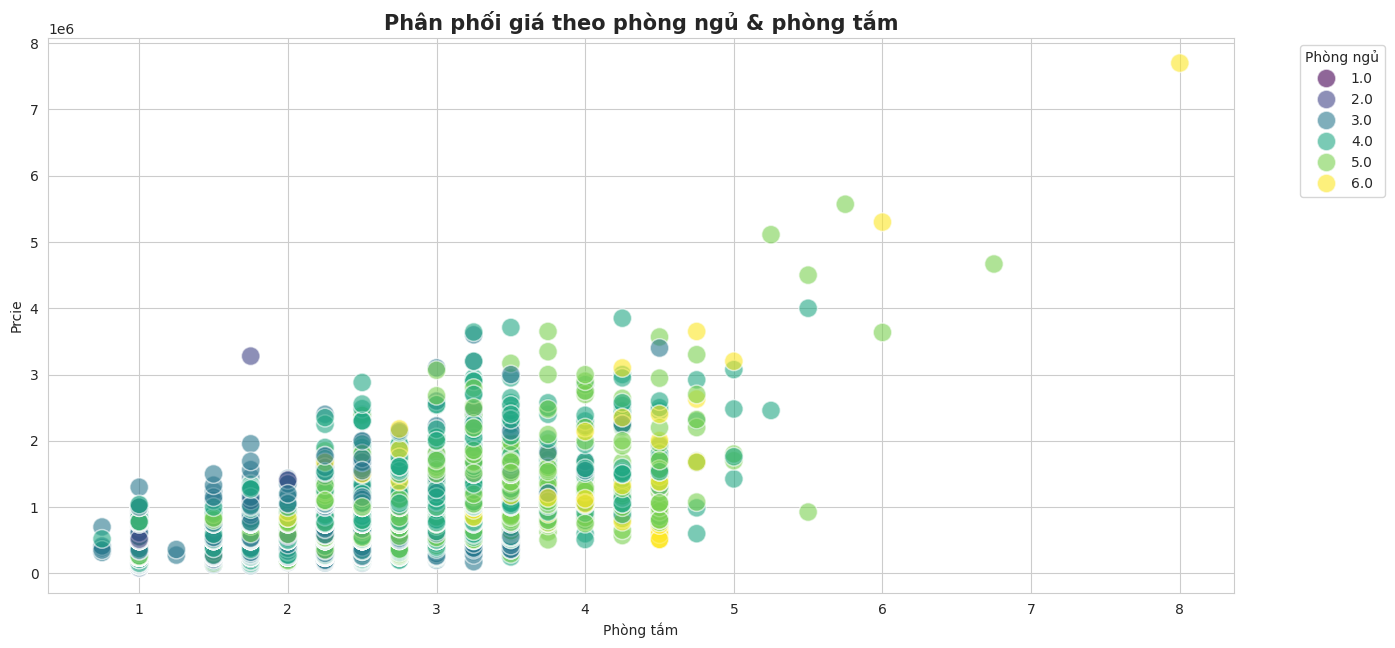

In [ ]:
plt.figure(figsize=(14,6.58))
sns.scatterplot(
    data=df_cleaned,
    x='bathrooms',
    y='price',
    size='bedrooms',
    hue='bedrooms',
    palette='viridis',
    alpha=0.6,
    sizes=(180, 180),
    s=2500
)


plt.title('Ph√¢n ph·ªëi gi√° theo ph√≤ng ng·ªß & ph√≤ng t·∫Øm', fontsize=15, fontweight='bold')
plt.xlabel('Ph√≤ng t·∫Øm')
plt.ylabel('Prcie')
plt.legend(title='Ph√≤ng ng·ªß', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán xu h∆∞·ªõng gi√° nh√† tƒÉng theo s·ªë l∆∞·ª£ng ph√≤ng t·∫Øm, ƒë·∫∑c bi·ªát khi v∆∞·ª£t m·ª©c 4 ph√≤ng t·∫Øm th√¨ gi√° c√≥ s·ª± b·ª©t ph√° r√µ r·ªát. S·ªë ph√≤ng ng·ªß (qua s·∫Øc ƒë·ªô m√†u) c≈©ng cho th·∫•y ·∫£nh h∆∞·ªüng nh·∫•t ƒë·ªãnh, nh∆∞ng kh√¥ng l·ªõn b·∫±ng ph√≤ng t·∫Øm ‚Äì nhi·ªÅu cƒÉn c√≥ t·ª´ 3 ƒë·∫øn 5 ph√≤ng ng·ªß nh∆∞ng m·ª©c gi√° v·∫´n ph√¢n t√°n r·ªông.

T·ª´ ƒë√≥, c√≥ th·ªÉ th·∫•y r·∫±ng ph√≤ng t·∫Øm l√† y·∫øu t·ªë ·∫£nh h∆∞·ªüng m·∫°nh h∆°n ƒë·∫øn gi√° nh√† so v·ªõi ph√≤ng ng·ªß.

V·ªõi ng∆∞·ªùi b√°n, vi·ªác ƒë·∫ßu t∆∞ c·∫£i t·∫°o ph√≤ng t·∫Øm c√≥ th·ªÉ l√† chi·∫øn l∆∞·ª£c n√¢ng gi√° hi·ªáu qu·∫£ h∆°n. V·ªõi ng∆∞·ªùi mua, n√™n c√¢n nh·∫Øc nhu c·∫ßu s·ª≠ d·ª•ng th·ª±c t·∫ø ƒë·ªÉ tr√°nh tr·∫£ th√™m cho nh·ªØng ti·ªán √≠ch ch∆∞a ch·∫Øc c·∫ßn thi·∫øt.

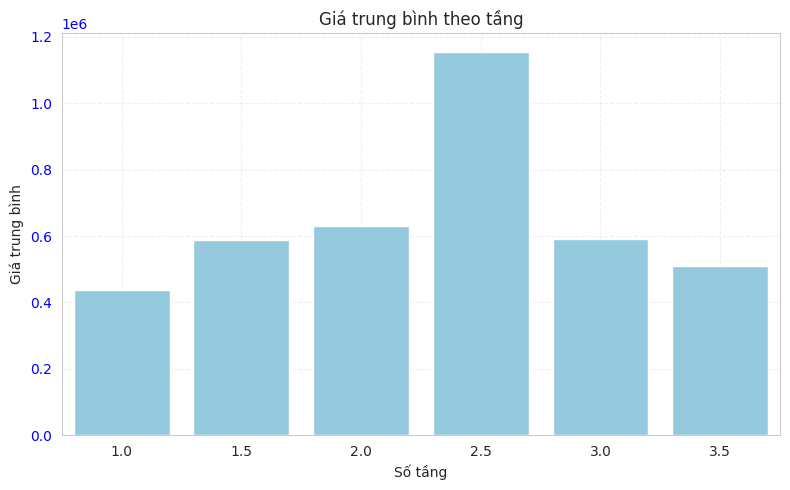

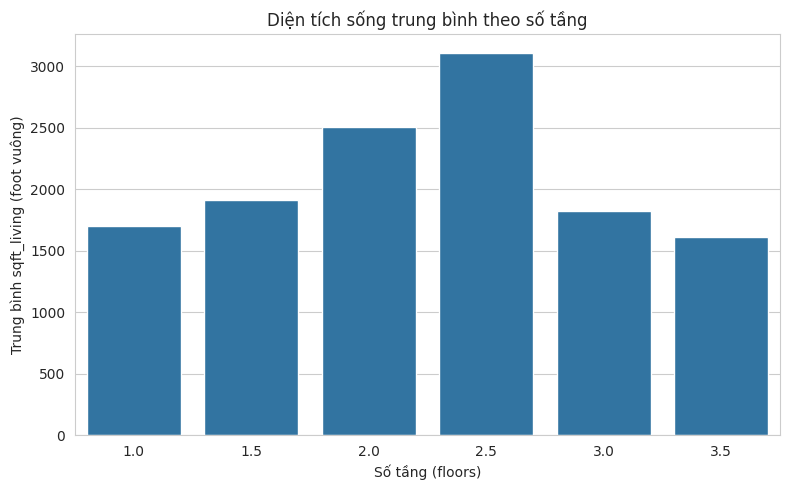

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# T√≠nh gi√° v√† grade trung b√¨nh theo s·ªë t·∫ßng
avg_data = df_cleaned.groupby('floors')[['price', 'grade']].mean().reset_index()

# T·∫°o 2 bi·ªÉu ƒë·ªì stacked d·ªçc
fig, axes = plt.subplots(1, 1, figsize=(8,5), sharex=True)

# --- Bi·ªÉu ƒë·ªì 1: Ch·ªâ Bar chart c·ªßa Price ---
sns.barplot(x='floors', y='price', data=avg_data, ax=axes, color='skyblue')
axes.set_ylabel('Gi√° trung b√¨nh')
axes.set_xlabel('S·ªë t·∫ßng')
axes.tick_params(axis='y', labelcolor='blue')
axes.set_title('Gi√° trung b√¨nh theo t·∫ßng')
axes.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
# T√≠nh trung b√¨nh sqft_living theo floors (kh√¥ng th√™m c·ªôt m·ªõi)
avg_sqft_by_floor = df_cleaned.groupby('floors')['sqft_living'].mean().reset_index()
avg_sqft_by_floor.columns = ['floors', 'avg_sqft_living']

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sqft_by_floor, x='floors', y='avg_sqft_living')
plt.title('Di·ªán t√≠ch s·ªëng trung b√¨nh theo s·ªë t·∫ßng')
plt.xlabel('S·ªë t·∫ßng (floors)')
plt.ylabel('Trung b√¨nh sqft_living (foot vu√¥ng)')
plt.tight_layout()
plt.show()

T·ª´ bi·ªÉu ƒë·ªì, c√≥ th·ªÉ th·∫•y nh√† c√≥ 2.5 t·∫ßng c√≥ gi√° trung b√¨nh cao v∆∞·ª£t tr·ªôi so v·ªõi c√°c m·ª©c t·∫ßng kh√°c. Tuy nhi√™n, m·ª©c gi√° ·ªü c√°c t·∫ßng c√≤n l·∫°i kh√¥ng ch√™nh l·ªách nhi·ªÅu. Do ƒë√≥, c·∫ßn xem x√©t th√™m y·∫øu t·ªë di·ªán t√≠ch s·ªëng trung b√¨nh, cho th·∫•y nh√† 2‚Äì2.5 t·∫ßng c≈©ng c√≥ di·ªán t√≠ch l·ªõn nh·∫•t.
C√≥ th·ªÉ k·∫øt lu·∫≠n r·∫±ng kh√¥ng ph·∫£i nhi·ªÅu t·∫ßng l√† gi√° s·∫Ω tƒÉng m√† ph·∫£i xem t·ªïng di·ªán t√≠ch c·ªßa t·ª´ng t·∫ßng l√† nh∆∞ th·∫ø n√†o. V√¨ v·∫≠y, khi ƒë√°nh gi√° gi√° tr·ªã nh√† theo t·∫ßng, ng∆∞·ªùi mua v√† ng∆∞·ªùi b√°n c·∫ßn ƒë·ªìng th·ªùi c√¢n nh·∫Øc y·∫øu t·ªë di·ªán t√≠ch s·ª≠ d·ª•ng ƒë·ªÉ c√≥ c√°i nh√¨n ƒë·∫ßy ƒë·ªß v√† ch√≠nh x√°c h∆°n.




#5. Correlation

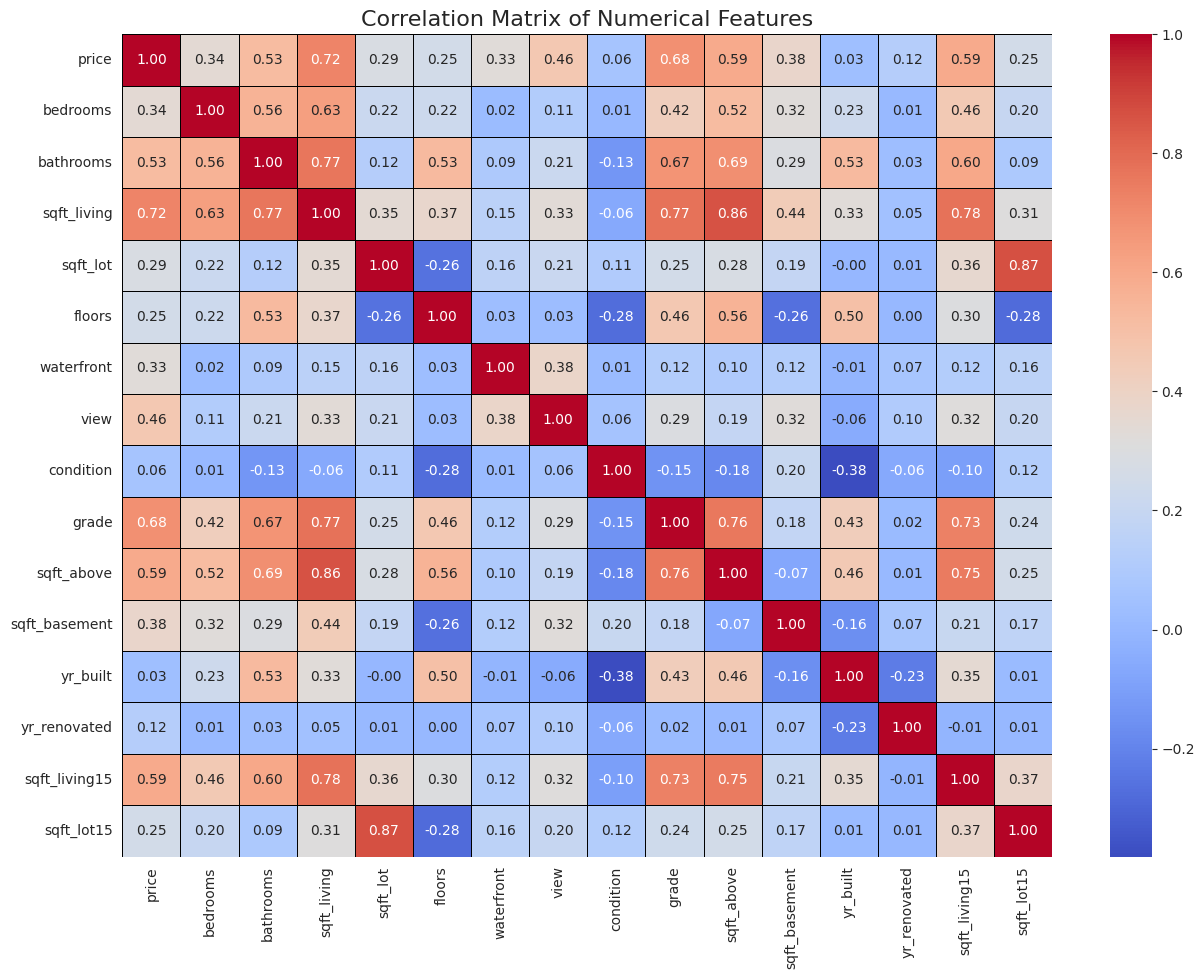

In [ ]:

# Removed the trailing comma to make it a list instead of a tuple containing a list
numeric_columns = ["date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"]

# Ensure 'date' is not included in the correlation calculation as it's datetime
# Create a temporary list excluding 'date' for correlation
cols_for_corr = [col for col in numeric_columns if col != 'date']

# Calculate correlation matrix using the list without 'date'
correlation_matrix = df_cleaned[cols_for_corr].corr()

# V·∫Ω heatmap
plt.figure(figsize=(15, 10.68))  # K√≠ch th∆∞·ªõc l·ªõn cho d·ªÖ nh√¨n
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",                   # L√†m tr√≤n 2 ch·ªØ s·ªë
    cmap="coolwarm",             # M√†u s·∫Øc ƒë·∫πp
    linewidths=0.6,              # ƒê∆∞·ªùng vi·ªÅn gi·ªØa c√°c √¥
    linecolor="black"            # M√†u vi·ªÅn
)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

Xem x√©t kh√¥ng ƒë∆∞a 2 bi·∫øn sqft_living15 v√† sqft_lot15 v√†o Linear Regression v√¨ hai bi·∫øn n√†y c√≥ t∆∞∆°ng quan l·ªõn v·ªõi sqft_living v√† sqft_lot. M√† 2 bi·∫øn b·ªã lo·∫°i n√†y ch·ªâ ph·∫£n √°nh di·ªán t√≠ch trung b√¨nh c·ªßa nh·ªØng cƒÉn nh√† l√¢n c·∫≠n trong khu v·ª±c, mang t√≠nh gi√°n ti·∫øp v√† kh√¥ng ƒë·∫∑c tr∆∞ng cho cƒÉn nh√† ƒëang x√©t.

#6. Linear Regression & Forecasting

In [ ]:
from sklearn.model_selection import train_test_split
# Ch·ªçn c√°c c·ªôt s·ªë ph√π h·ª£p (lo·∫°i b·ªè 'date')
x = df_cleaned[[
    "bedrooms", "bathrooms", "sqft_living","sqft_lot", "floors",
    "waterfront", "view", "condition", "grade",
    "sqft_basement", "yr_built", "yr_renovated", "sqft_above" # Added sqft_above
]]
y = df_cleaned['price']

# Chia d·ªØ li·ªáu train-test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Th√™m h·∫±ng s·ªë v√†o x_train
X_train = sm.add_constant(X_train)

# Chuy·ªÉn ki·ªÉu d·ªØ li·ªáu ƒë·ªÉ tr√°nh l·ªói
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

# Hu·∫•n luy·ªán m√¥ h√¨nh OLS
model = sm.OLS(y_train, X_train).fit()

# In k·∫øt qu·∫£
print(model.summary())
print(model.params.to_string(float_format='{:0.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2366.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:12   Log-Likelihood:            -1.5991e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11763   BIC:                         3.200e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.873e+06    1.7e+05     34.599

X√≥a 2 bi·∫øn sqft_lot v√† yr_renovated ra kh·ªèi m√¥ h√¨nh v√¨ c√≥ p_value > 0.05

In [ ]:
from sklearn.model_selection import train_test_split
# Ch·ªçn c√°c c·ªôt s·ªë ph√π h·ª£p (lo·∫°i b·ªè 'date')
x = df_cleaned[[
    "bedrooms", "bathrooms", "sqft_living", "floors",
    "waterfront", "view", "condition", "grade",
    "sqft_basement", "yr_built", "sqft_above"
]]
y = df_cleaned['price']

# Chia d·ªØ li·ªáu train-test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Th√™m h·∫±ng s·ªë v√†o x_train
X_train = sm.add_constant(X_train)

# Chuy·ªÉn ki·ªÉu d·ªØ li·ªáu ƒë·ªÉ tr√°nh l·ªói
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

# Hu·∫•n luy·ªán m√¥ h√¨nh OLS
model = sm.OLS(y_train, X_train).fit()

# In k·∫øt qu·∫£ (summary and params of model_first)
print(model.summary())
print(model.params.to_string(float_format='{:0.2f}'.format))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2839.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:13   Log-Likelihood:            -1.5992e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11765   BIC:                         3.199e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.935e+06   1.61e+05     36.975

M√¥ h√¨nh ƒë∆∞·ª£c c·∫£nh b√°o ƒëang c√≥ ƒëa c·ªông tuy·∫øn v√† h·ªá s·ªë bedrooms mang gi√° tr·ªã √¢m l·ªõn l√† kh√¥ng h·ª£p l√Ω. N√™n ƒë√£ chu·∫©n h√≥a b·∫±ng 2 ph∆∞∆°ng ph√°p Z-score v√† MaxMin

##6.1. Z-Score

In [ ]:
from sklearn.preprocessing import StandardScaler

# B∆∞·ªõc 1: Ch·ªçn bi·∫øn ƒë·∫ßu v√†o
features = ["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
            "condition", "grade", "sqft_basement", "yr_built"]


# B∆∞·ªõc 2: Chu·∫©n h√≥a X_train, X_test
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train[features])
X_test_scaled_array = scaler.transform(X_test[features])  # d√πng transform th√¥i

# ƒê∆∞a v·ªÅ DataFrame (v·ªõi ch·ªâ s·ªë kh·ªõp)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=features, index=X_test.index)

# B∆∞·ªõc 3: Th√™m constant & ch·∫°y OLS tr√™n train
X_train_scaled_const = sm.add_constant(X_train_scaled)
model_scaled = sm.OLS(y_train, X_train_scaled_const).fit()

# B∆∞·ªõc 4: In k·∫øt qu·∫£
print(model_scaled.summary())
print(model_scaled.params.to_string(float_format='{:.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2839.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:13   Log-Likelihood:            -1.5992e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11765   BIC:                         3.199e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.366e+05   1762.390    304.494

##6.2. Min-Max

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Import train_test_split

features = [
    "bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
    "condition", "grade", "sqft_basement", "yr_built"
]

# Chu·∫©n h√≥a MinMax cho t·∫≠p train
scaler = MinMaxScaler()
X_train_scaled_array = scaler.fit_transform(X_train[features])

# Gi·ªØ l·∫°i index g·ªëc ƒë·ªÉ kh·ªõp v·ªõi y_train
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=features, index=X_train.index)

# Th√™m h·∫±ng s·ªë v√†o
X_train_scaled = sm.add_constant(X_train_scaled)

# H·ªìi quy tuy·∫øn t√≠nh OLS
model = sm.OLS(y_train, X_train_scaled).fit()

# In k·∫øt qu·∫£
print(model.summary())
print(model.params.to_string(float_format='{:.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2839.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:14   Log-Likelihood:            -1.5992e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11765   BIC:                         3.199e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           409.9178   1.21e+04      0.034

H·ªá s·ªë bedrooms v·∫´n √¢m n√™n ƒë√£ th·ª≠ m√¥ h√¨nh kh√°c

##6.3. Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

features = [
    "bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
    "condition", "grade", "sqft_basement", "yr_built"
]

# D·ªØ li·ªáu ƒë·∫ßu v√†o
x_train = X_train[features]
y_train = y_train  # ƒë√£ c√≥ t·ª´ tr∆∞·ªõc

# ElasticNet model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(x_train, y_train)

# In h·ªá s·ªë
coefs = pd.Series(model.coef_, index=x_train.columns)
print(coefs[coefs != 0].sort_values())  # Ch·ªâ in h·ªá s·ªë kh√°c 0

bedrooms         -46586.220623
yr_built          -3411.454915
sqft_basement        12.654374
sqft_living         200.970121
condition         24490.545068
bathrooms         26918.334719
floors            31986.580528
waterfront        68727.707382
view              74338.629484
grade            114004.996979
dtype: float64


bedrooms v·∫´n √¢m n√™n ti·∫øp t·ª•c th·ª≠ ph∆∞∆°ng √°n kh√°c

##6.4. Price/sqft

In [ ]:
import statsmodels.api as sm

# T·∫°o bi·∫øn Y m·ªõi: gi√° m·ªói foot vu√¥ng
y_train_sqft = y_train / X_train['sqft_living']

# Ch·ªçn bi·∫øn ƒë·∫ßu v√†o t·ª´ t·∫≠p train
features = [
    "bedrooms", "bathrooms", "floors", "waterfront", "view",
    "condition", "grade", "yr_built",'sqft_basement'
]
x_train_sqft = X_train[features]

# Th√™m constant v√† √©p ki·ªÉu float64
x_train_sqft = sm.add_constant(x_train_sqft)
x_train_sqft = x_train_sqft.astype('float64')

# H·ªìi quy tuy·∫øn t√≠nh
model = sm.OLS(y_train_sqft, x_train_sqft).fit()

# In k·∫øt qu·∫£
print(model.summary())
print(model.params.to_string(float_format='{:.2f}'.format))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     669.6
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:14   Log-Likelihood:                -69431.
No. Observations:               11776   AIC:                         1.389e+05
Df Residuals:                   11766   BIC:                         1.390e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3310.3823     73.850     44.826

Ra gi·∫£ ƒë·ªãnh bedrooms √¢m v√¨ trong th·ª±c t·∫ø nh·ªØng cƒÉn nh√† 2 ph√≤ng ng·ªß th∆∞·ªùng c√≥ gi√°/ft vu√¥ng r·∫ª h∆°n cƒÉn 1 ph√≤ng ng·ªß. N√™n thay bi·∫øn ph·ª• thu·ªôc y t·ª´ price th√†nh price/sqft. Tuy nhi√™n m√¥ h√¨nh c√≥ S-squared th·∫•p c√πng v·ªõi vi·ªác c√°c bi·∫øn c√≤n l·∫°i th∆∞·ªùng c√≥ xu h∆∞·ªõng ·∫£nh h∆∞·ªüng ƒë·∫øn t·ªïng gi√° tr·ªã cƒÉn nh√† nhi·ªÅu h∆°n, n√™n chuy·ªÉn sang gi·∫£ ƒë·ªãnh kh√°c

## 6.5. Final - Linear Regression

S·∫Ω g·ªôp 2 bi·∫øn ƒë·ªôc l·∫≠p bedrooms v√† sqft_above v·ªÅ th√†nh 1. B·∫±ng c√°ch l·∫•y sqft_above/bedrooms. H·ªá s·ªë n√†y cho th·∫•y t·ªâ l·ªá di·ªán t√≠ch tr√™n ph√≤ng ng·ªß, t·ª©c l√† ƒë·ªô r·ªông r·∫£i c·ªßa 1 cƒÉn nh√† khi x√©t tr√™n di·ªán t√≠ch v√† ph√≤ng ng·ªß.

C√πng di·ªán t√≠ch nh∆∞ng nhi·ªÅu ph√≤ng ng·ªß h∆°n ‚Üí t·ª∑ l·ªá gi·∫£m ‚Üí nh√† ch·∫≠t h∆°n.

C√πng s·ªë ph√≤ng ng·ªß nh∆∞ng di·ªán t√≠ch l·ªõn h∆°n ‚Üí t·ª∑ l·ªá tƒÉng ‚Üí nh√† r·ªông r√£i h∆°n.

In [ ]:
import statsmodels.api as sm

# Ensure X_train, X_test, y_train, y_test are already defined from a previous train_test_split

# Select features for the model
features_for_model = [
    "bathrooms", "floors", "waterfront", "view",
    "condition", "grade", "yr_built", "sqft_basement","sqft_living"
]

# Create training data for the interaction model
x_train_interact = X_train[features_for_model].copy()
# Add the interaction term using columns from X_train
x_train_interact['sqft/bedrooms'] = X_train['sqft_above'] / X_train['bedrooms']

# Target variable
y_train_interact = y_train

# Add constant and set data type
x_train_interact = sm.add_constant(x_train_interact)
x_train_interact = x_train_interact.astype('float64')

# Linear regression model
model1 = sm.OLS(y_train_interact, x_train_interact).fit()

# Print results
print(model1.summary())
print(model1.params.to_string(float_format='{:.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2773.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:15   Log-Likelihood:            -1.6001e+05
No. Observations:               11776   AIC:                         3.200e+05
Df Residuals:                   11765   BIC:                         3.201e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.828e+06   1.62e+05     36.023

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split


# L·∫•y bi·∫øn ƒë·∫ßu v√†o t·ª´ t·∫≠p train
features_for_interaction = ["bathrooms", "floors", "waterfront", "view", "condition", "grade", "yr_built", "sqft_basement","sqft_living"]
x_train_interact = X_train[features_for_interaction].copy()

# Th√™m bi·∫øn t∆∞∆°ng t√°c
x_train_interact['sqft/bedrooms'] = X_train['sqft_above'] / X_train['bedrooms']

# L·∫•y bi·∫øn ƒë·∫ßu v√†o t·ª´ t·∫≠p test
x_test_interact = X_test[features_for_interaction].copy()

# Th√™m bi·∫øn t∆∞∆°ng t√°c v√†o t·∫≠p test
x_test_interact['sqft/bedrooms'] = X_test['sqft_above'] / X_test['bedrooms']


# M·ª•c ti√™u
y_train_interact = y_train

# Chu·∫©n h√≥a MinMax
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_interact)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train_interact.columns, index=x_train_interact.index) # Set the index to match x_train_interact

# Scale the test data using the same scaler
x_test_scaled = scaler.transform(x_test_interact)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test_interact.columns, index=x_test_interact.index)


# Th√™m constant v√† √©p ki·ªÉu
x_train_scaled_const = sm.add_constant(x_train_scaled)
x_train_scaled_const = x_train_scaled_const.astype('float64')

# Add constant to scaled test set
x_test_scaled_const = sm.add_constant(x_test_scaled)
x_test_scaled_const = x_test_scaled_const.astype('float64')


# H·ªìi quy
model_final = sm.OLS(y_train_interact, x_train_scaled_const).fit()

# In k·∫øt qu·∫£
print(model_final.summary())
print(model_final.params.to_string(float_format='{:.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2773.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:15   Log-Likelihood:            -1.6001e+05
No. Observations:               11776   AIC:                         3.200e+05
Df Residuals:                   11765   BIC:                         3.201e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -8.38e+04   1.16e+04     -7.241

Ch·∫•p nh·∫≠n m√¥ h√¨nh n√†y v√¨ c√≥ R-Squared t∆∞∆°ng ƒë·ªëi cao l√† 70.2% v√† c√°c bi·∫øn kh√¥ng c√≥ p_value > 0, c√°c h·ªá s·ªë c≈©ng th√≠ch h·ª£p.

#7. Forecasting

TH1: C√°c y·∫øu t·ªë kh√°c kh√¥ng ƒë·ªïi, view tƒÉng t·ª´ 2 l√™n 3 v√† waterfront tƒÉng t·ª´ 0 l√™n 1

In [ ]:
# 0. T·∫°o c·ªôt t∆∞∆°ng t√°c n·∫øu c·∫ßn
df_cleaned['sqft/bedrooms'] = df_cleaned['sqft_above'] / df_cleaned['bedrooms']
vars_model = list(model1.params.index)
vars_model.remove('const')

# 2. Gi√° tr·ªã m·∫∑c ƒë·ªãnh (mean) n·∫øu b·∫°n mu·ªën gi·ªØ nguy√™n
base = df_cleaned[vars_model].mean().to_dict()

# 3. Kh·ªüi t·∫°o 2 k·ªãch b·∫£n th·ª≠ nghi·ªám
cases = []
# case 0: ch∆∞a waterfront, view=2
c0 = base.copy()
c0.update({
    'bathrooms':    3,
    'floors':       2,
    'waterfront':   0,
    'view':         2,
    'grade':        8,
    'yr_built':   1950,
    'sqft_basement':500,
    'sqft_living': 2290,
    'sqft/bedrooms':600
})
# case 1: ƒë√£ waterfront, view=4
c1 = base.copy()
c1.update({
    'bathrooms':    3,
    'floors':       2,
    'waterfront':   1,
    'view':         3,
    'grade':        8,
    'yr_built':   1950,
    'sqft_basement':500,
    'sqft_living': 2290,
    'sqft/bedrooms':600
})
cases = [c0, c1]

# 4. T·∫°o DataFrame, add constant v√† predict
import pandas as pd, statsmodels.api as sm
test_data = pd.DataFrame(cases)
test_data = sm.add_constant(test_data, has_constant='add')
output = model1.predict(test_data)

# Create a DataFrame from the output series before trying to access columns
output_df = pd.DataFrame({'predicted_price': output})

output_df['predicted_price'] = output_df['predicted_price'].map(lambda x: f"{x:,.2f}")
print(output_df)

  predicted_price
0      845,362.93
1    1,636,357.07


TH2: C√°c y·∫øu t·ªë kh√°c kh√¥ng ƒë·ªïi, tƒÉng t·ªâ l·ªá sqft/bedrooms t·ª´ 600 l√™n 1600

In [ ]:
# 1. L·∫•y danh s√°ch bi·∫øn (kh√¥ng g·ªìm 'const')
vars_model = list(model1.params.index)
vars_model.remove('const')

# 2. Gi√° tr·ªã m·∫∑c ƒë·ªãnh (mean) n·∫øu b·∫°n mu·ªën gi·ªØ nguy√™n
base = df_cleaned[vars_model].mean().to_dict()

# 3. Kh·ªüi t·∫°o 2 k·ªãch b·∫£n th·ª≠ nghi·ªám
cases = []
# case 0: ch∆∞a waterfront, view=2
c0 = base.copy()
c0.update({
    'bathrooms':    3,
    'floors':       2,
    'waterfront':   0,
    'view':         2,
    'grade':        8,
    'yr_built':   1950,
    'sqft_basement':500,
    'sqft_living': 3290,
    'sqft/bedrooms':600
})
# case 1: ƒë√£ waterfront, view=4
c1 = base.copy()
c1.update({
    'bathrooms':    3,
    'floors':       2,
    'waterfront':   0,
    'view':         2,
    'grade':        8,
    'yr_built':   1950,
    'sqft_basement':500,
    'sqft_living': 3290,
    'sqft/bedrooms':1600
})
cases = [c0, c1]

# 4. T·∫°o DataFrame, add constant v√† predict
import pandas as pd, statsmodels.api as sm
test_data = pd.DataFrame(cases)
test_data = sm.add_constant(test_data, has_constant='add')
output = model1.predict(test_data)

# Create a DataFrame from the output series before trying to access columns
output_df = pd.DataFrame({'predicted_price': output})

output_df['predicted_price'] = output_df['predicted_price'].map(lambda x: f"{x:,.2f}")
print(output_df)

  predicted_price
0      975,235.63
1    1,099,836.48


K·∫øt qu·∫£ d·ª± ƒëo√°n cho th·∫•y t√°c ƒë·ªông c·ªßa c√°c bi·∫øn ƒë·ªôc l·∫≠p ƒë·∫øn gi√° nh√† l√† h·ª£p l√Ω v√† ph√π h·ª£p v·ªõi c√°c ph√¢n t√≠ch ƒë√£ th·ª±c hi·ªán tr∆∞·ªõc ƒë√≥.

#8. Evaluating the Model

In [ ]:
import numpy as np

# ===== D·ª± ƒëo√°n tr√™n t·∫≠p test =====
y_pred = model_final.predict(x_test_scaled_const)   # ƒë√£ c√≥ c·ªôt const

# ===== T√≠nh MSE v√† RMSE th·ªß c√¥ng =====
mse  = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f"MSE : {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")


MSE : 45,080,965,130.60
RMSE: 212,322.79


In [ ]:
df_cleaned['price'].describe()

count    1.472000e+04
mean     5.355619e+05
std      3.589020e+05
min      8.100000e+04
25%      3.190000e+05
50%      4.460000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

So s√°nh v·ªõi Gi√° tr·ªã Trung b√¨nh: Gi√° tr·ªã trung b√¨nh c·ªßa c·ªôt price l√† 535.561 USD. RMSE b·∫±ng 212.323 USD, t∆∞∆°ng ƒë∆∞∆°ng kho·∫£ng 39,6% c·ªßa gi√° trung b√¨nh. ƒêi·ªÅu n√†y cho th·∫•y sai s·ªë d·ª± ƒëo√°n trung b√¨nh chi·∫øm g·∫ßn 40% c·ªßa m·ªôt m·ª©c gi√° nh√† ƒëi·ªÉn h√¨nh trong t·∫≠p d·ªØ li·ªáu.

So s√°nh v·ªõi ƒê·ªô l·ªách Chu·∫©n: ƒê·ªô l·ªách chu·∫©n c·ªßa price l√† 358.902 USD. RMSE kho·∫£ng 59,2% ƒë·ªô l·ªách chu·∫©n. ƒêi·ªÅu n√†y cho th·∫•y sai s·ªë c·ªßa m√¥ h√¨nh b·∫±ng h∆°n m·ªôt n·ª≠a m·ª©c bi·∫øn ƒë·ªông t·ª± nhi√™n c·ªßa d·ªØ li·ªáu, cho th·∫•y m√¥ h√¨nh c√≤n c√≥ th·ªÉ c·∫£i thi·ªán.

Kho·∫£ng gi√° (Range): Gi√° nh√† dao ƒë·ªông t·ª´ 81.000 USD ƒë·∫øn 7.700.000 USD, t·ª©c t·ªïng bi√™n ƒë·ªô 7.619.000 USD. RMSE 212.323 USD chi·∫øm ch·ªâ 2,8% c·ªßa to√†n b·ªô kho·∫£ng gi√°. Trong b·ªëi c·∫£nh to√†n th·ªã tr∆∞·ªùng, sai s·ªë n√†y v·∫´n l√† m·ªôt ph·∫ßn r·∫•t nh·ªè so v·ªõi bi√™n ƒë·ªô gi√°.

T√≥m t·∫Øt:

So v·ªõi Trung b√¨nh: RMSE ‚âà 39,6% c·ªßa gi√° trung b√¨nh, cho th·∫•y sai s·ªë t∆∞∆°ng ƒë·ªëi l·ªõn so v·ªõi m·ª©c gi√° ph·ªï bi·∫øn.

So v·ªõi ƒê·ªô l·ªách Chu·∫©n: RMSE ‚âà 59,2% œÉ, ph·∫£n √°nh sai s·ªë ƒë√°ng k·ªÉ so v·ªõi ƒë·ªô bi·∫øn thi√™n ƒëi·ªÉn h√¨nh.

So v·ªõi Kho·∫£ng gi√°: RMSE ‚âà 2,8% bi√™n ƒë·ªô d·ªØ li·ªáu, cho th·∫•y tr√™n quy m√¥ to√†n th·ªã tr∆∞·ªùng, sai s·ªë l√† r·∫•t nh·ªè.

Tuy nhi√™n RMSE n√†y v·∫´n c√≥ th·ªÉ ch·∫•p nh·∫≠n ƒë∆∞·ª£c v·ªõi nh·ªØng t√≠nh ch·∫•t sau

üîπ 1. ƒê·∫∑c ƒëi·ªÉm c·ªßa ng√†nh: Gi√° nh√† bi·∫øn ƒë·ªông r·∫•t l·ªõn, ƒë·∫∑c bi·ªát ·ªü nh·ªØng khu v·ª±c nh∆∞ Seattle ho·∫∑c Bellevue ‚Äì n∆°i c√≥ nh·ªØng cƒÉn nh√† cao c·∫•p l√™n ƒë·∫øn 7 tri·ªáu USD.

T√≠nh ch·∫•t c·ªßa ng√†nh BƒêS l√† d·ªØ li·ªáu kh√¥ng ƒë·ªìng nh·∫•t, tr·∫£i d√†i t·ª´ nh√† gi√° r·∫ª ƒë·∫øn bi·ªát th·ª±, n√™n kho·∫£ng dao ƒë·ªông r·∫•t r·ªông.

üîπ 2. So v·ªõi t·∫≠p d·ªØ li·ªáu: Gi√° trung b√¨nh c·ªßa b·∫°n l√† kho·∫£ng 535,561 USD, RMSE chi·∫øm ~40% c·ªßa gi√° trung b√¨nh.

Nh∆∞ng n·∫øu nh√¨n v√†o range d·ªØ li·ªáu t·ª´ 81,000 ƒë·∫øn 7.7 tri·ªáu USD, th√¨ RMSE ch·ªâ chi·∫øm ~2.8% ‚Üí sai s·ªë nh·ªè n·∫øu x√©t to√†n th·ªã tr∆∞·ªùng.

üîπ 3. Trong ·ª©ng d·ª•ng th·ª±c t·∫ø: N·∫øu m√¥ h√¨nh d√πng ƒë·ªÉ ph√¢n t√≠ch xu h∆∞·ªõng, ƒë√°nh gi√° t·ªïng quan ho·∫∑c h·ªó tr·ª£ ƒë·ªãnh gi√° s∆° b·ªô, th√¨ RMSE n√†y l√† ch·∫•p nh·∫≠n ƒë∆∞·ª£c.

Nh∆∞ng n·∫øu ƒë·ªÉ ƒë·ªãnh gi√° ch√≠nh x√°c t·ª´ng cƒÉn cho giao d·ªãch, c·∫ßn gi·∫£m RMSE xu·ªëng n·ªØa, ho·∫∑c nh√≥m ph√¢n kh√∫c (theo khu v·ª±c, di·ªán t√≠ch, ph√¢n kh√∫c cao c·∫•p/gi√° r·∫ª) ƒë·ªÉ tƒÉng ƒë·ªô ch√≠nh x√°c.

üìå K·∫øt lu·∫≠n: RMSE n√†y tuy cao, nh∆∞ng v·∫´n h·ª£p l√Ω v√† ch·∫•p nh·∫≠n ƒë∆∞·ª£c khi xem x√©t trong b·ªëi c·∫£nh d·ªØ li·ªáu r·ªông, ƒëa d·∫°ng v√† ƒë·∫∑c th√π ng√†nh b·∫•t ƒë·ªông s·∫£n. Tuy nhi√™n, n·∫øu mu·ªën tƒÉng ƒë·ªô ch√≠nh x√°c cho t·ª´ng nh√≥m nh√†, b·∫°n n√™n ph√¢n c·ª•m d·ªØ li·ªáu ho·∫∑c s·ª≠ d·ª•ng th√™m c√°c m√¥ h√¨nh n√¢ng cao.
